In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score

from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

import random
import string
from datetime import date
random.seed(1)
import copy

import tensorflow as tf
from tensorflow.keras.initializers import random_uniform

initializer=random_uniform(seed=1)

tf.random.set_seed(1)
np.random.seed(1)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

c:\Users\SS5891\OneDrive - Hitachi Energy\Desktop\Intern\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

columns=['Customer Name','MVA','HV','Quantity','Sales Stage','Reason','Aging','Awarding period','Requested Bidding Date','Actual Bidding Date','Total Sales']
Values=[]
Stage=['Lost','Won','cancelled','Under Progress']
Reas=['Price','Poor Customer Service/Relationship','Delivery Delays','Technical issues','Incorrect Bid','DisQualified','Competitors','Unknown','Regular Customer']

for i in range(0,600):
  Row=[random.choice(list(string.ascii_uppercase)),random.randint(10,500),random.randint(10,800),
       random.randint(1,20),random.choice(Stage),
       random.choice(Reas),random.randint(-80,50),random.randint(30,60)]

  Values.append(Row)
  #print(Row)


In [3]:
sales_mill = np.random.lognormal(mean=2, sigma=0.5, size=600) * 1  # Sales in millions
sales_in_millions = np.round(sales_mill, 2)  # Round to 2 decimal places

In [4]:
award_date_range = pd.date_range(start="2016-01-01", end="2021-12-31")  # Full range of dates
Award_date_created= np.random.choice(award_date_range, size=600)  # Randomly sample with repetition
Award_date=sorted(Award_date_created)

In [5]:
Transformer_Sales=pd.DataFrame(Values,columns=columns[0:8])
Transformer_Sales['Total Sales']=sales_in_millions
Transformer_Sales['Award Date']=Award_date
Transformer_Sales.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Awarding period,Total Sales,Award Date
0,E,301,792,3,cancelled,Poor Customer Service/Relationship,46,54,16.65,2016-01-01
1,O,251,677,13,Won,Poor Customer Service/Relationship,44,30,5.44,2016-01-01
2,M,231,632,1,Under Progress,Incorrect Bid,-22,48,5.67,2016-01-01
3,D,471,335,1,Lost,Price,-78,60,4.32,2016-01-03
4,M,361,231,14,Lost,Regular Customer,-24,54,11.39,2016-01-09


In [6]:
Transformer_Sales[Transformer_Sales['Total Sales']<0]

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Awarding period,Total Sales,Award Date


In [7]:
Transformer_Sales['Requested Bidding Date']=Transformer_Sales['Award Date']- pd.to_timedelta(Transformer_Sales['Awarding period'], unit='D')
Transformer_Sales['Actual Bidding Date']=Transformer_Sales['Requested Bidding Date']- pd.to_timedelta(Transformer_Sales['Aging'], unit='D')
Transformer_Sales.drop('Awarding period',axis=1,inplace=True)
Transformer_Sales.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date
0,E,301,792,3,cancelled,Poor Customer Service/Relationship,46,16.65,2016-01-01,2015-11-08,2015-09-23
1,O,251,677,13,Won,Poor Customer Service/Relationship,44,5.44,2016-01-01,2015-12-02,2015-10-19
2,M,231,632,1,Under Progress,Incorrect Bid,-22,5.67,2016-01-01,2015-11-14,2015-12-06
3,D,471,335,1,Lost,Price,-78,4.32,2016-01-03,2015-11-04,2016-01-21
4,M,361,231,14,Lost,Regular Customer,-24,11.39,2016-01-09,2015-11-16,2015-12-10


In [8]:
Transformer_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer Name           600 non-null    object        
 1   MVA                     600 non-null    int64         
 2   HV                      600 non-null    int64         
 3   Quantity                600 non-null    int64         
 4   Sales Stage             600 non-null    object        
 5   Reason                  600 non-null    object        
 6   Aging                   600 non-null    int64         
 7   Total Sales             600 non-null    float64       
 8   Award Date              600 non-null    datetime64[ns]
 9   Requested Bidding Date  600 non-null    datetime64[ns]
 10  Actual Bidding Date     600 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(4), object(3)
memory usage: 51.7+ KB


In [9]:
Transformer_Sales['Requested Bidding Date']=pd.to_datetime(Transformer_Sales['Requested Bidding Date'])
Transformer_Sales['Actual Bidding Date']=pd.to_datetime(Transformer_Sales['Actual Bidding Date'])
Transformer_Sales['Award Date']=pd.to_datetime(Transformer_Sales['Award Date'])

# **EDA**

In [10]:
Transformer_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer Name           600 non-null    object        
 1   MVA                     600 non-null    int64         
 2   HV                      600 non-null    int64         
 3   Quantity                600 non-null    int64         
 4   Sales Stage             600 non-null    object        
 5   Reason                  600 non-null    object        
 6   Aging                   600 non-null    int64         
 7   Total Sales             600 non-null    float64       
 8   Award Date              600 non-null    datetime64[ns]
 9   Requested Bidding Date  600 non-null    datetime64[ns]
 10  Actual Bidding Date     600 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(4), object(3)
memory usage: 51.7+ KB


In [11]:
Transformer_Sales.describe(include=np.number)

,MVA,HV,Quantity,Aging,Total Sales
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,258.668333,394.421667,10.435000,-12.631667,8.648800
std,140.434700,223.427790,5.721626,37.773192,4.703666
min,10.000000,13.000000,1.000000,-80.000000,1.830000
25%,139.750000,214.250000,5.000000,-43.250000,5.460000
50%,268.000000,379.000000,10.000000,-11.500000,7.570000
75%,380.000000,586.000000,15.000000,19.000000,10.720000
max,498.000000,800.000000,20.000000,50.000000,53.480000


# **Quantity**
*   Mostly customers order average of 10 quantity
*   Total 600 Transformers sold

# **Bid submission**
*   Regular delay in the bidding process with mean of 12 days delayed submission
*   Quarter of our orders are delayed by  43 days

# **Sales**
*   Average order amount is 8.4 cr
*   Max order amount is 53cr

# Note:For observation look above statistics

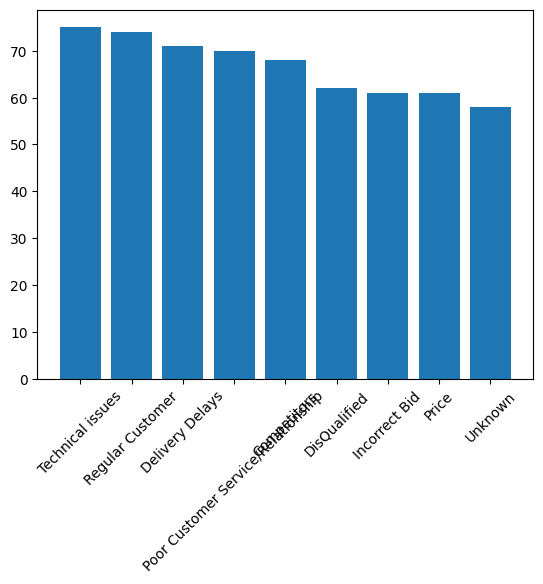

In [12]:
Reason=Transformer_Sales['Reason'].value_counts()
plt.bar(Reason.index,Reason)
plt.xticks(rotation=45)
plt.show()

# Note: Similar observations of Reason for closing the order is given from high to  low count

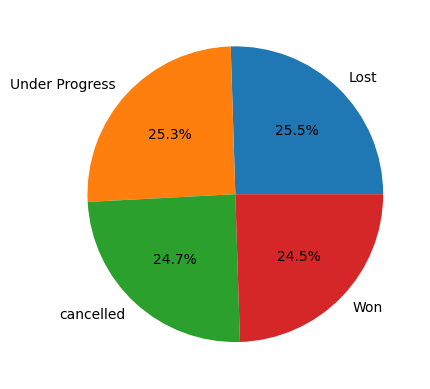

In [13]:
Sales_pie=Transformer_Sales['Sales Stage'].value_counts()
plt.pie(Sales_pie, labels=Sales_pie.index, autopct='%1.1f%%')
plt.show()

In [14]:
Sales_pie

Sales Stage
Lost              153
Under Progress    152
cancelled         148
Won               147
Name: count, dtype: int64

# Note:Observations of Stales Stage and count given

In [15]:
New_Data=copy.deepcopy(Transformer_Sales)
New_Data.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date
0,E,301,792,3,cancelled,Poor Customer Service/Relationship,46,16.65,2016-01-01,2015-11-08,2015-09-23
1,O,251,677,13,Won,Poor Customer Service/Relationship,44,5.44,2016-01-01,2015-12-02,2015-10-19
2,M,231,632,1,Under Progress,Incorrect Bid,-22,5.67,2016-01-01,2015-11-14,2015-12-06
3,D,471,335,1,Lost,Price,-78,4.32,2016-01-03,2015-11-04,2016-01-21
4,M,361,231,14,Lost,Regular Customer,-24,11.39,2016-01-09,2015-11-16,2015-12-10


# **HIT RATE**

In [16]:
Customers=np.unique(New_Data['Customer Name'])

In [17]:
won_counts = []
lost_counts = []
hit_rates = []

for i in Customers:
    won_df = New_Data[(New_Data["Sales Stage"] == "Won") &
                      (New_Data['Customer Name'] == i)]["Sales Stage"]
    won_count = won_df.value_counts().iloc[0] if not won_df.empty else 0

    lost_df = New_Data[(New_Data["Sales Stage"] == "Lost") &
                       (New_Data['Customer Name'] == i)]["Sales Stage"]
    lost_count = lost_df.value_counts().iloc[0] if not lost_df.empty else 0

    hit_rate = (won_count / (won_count + lost_count)) * 100 if won_count + lost_count > 0 else 0

    won_counts.append(won_count)
    lost_counts.append(lost_count)
    hit_rates.append(hit_rate)


In [18]:
dict_list = list(zip(Customers,won_counts, lost_counts, hit_rates))

# Sort the list by the hit_rate (4th element in the tuple) in descending order
sorted_data = sorted(dict_list, key=lambda x: x[3], reverse=True)


In [19]:
Customers= [tup[0] for tup in sorted_data]
won_counts= [tup[1] for tup in sorted_data]
lost_counts=  [tup[2] for tup in sorted_data]
hit_rates=  [tup[3] for tup in sorted_data]

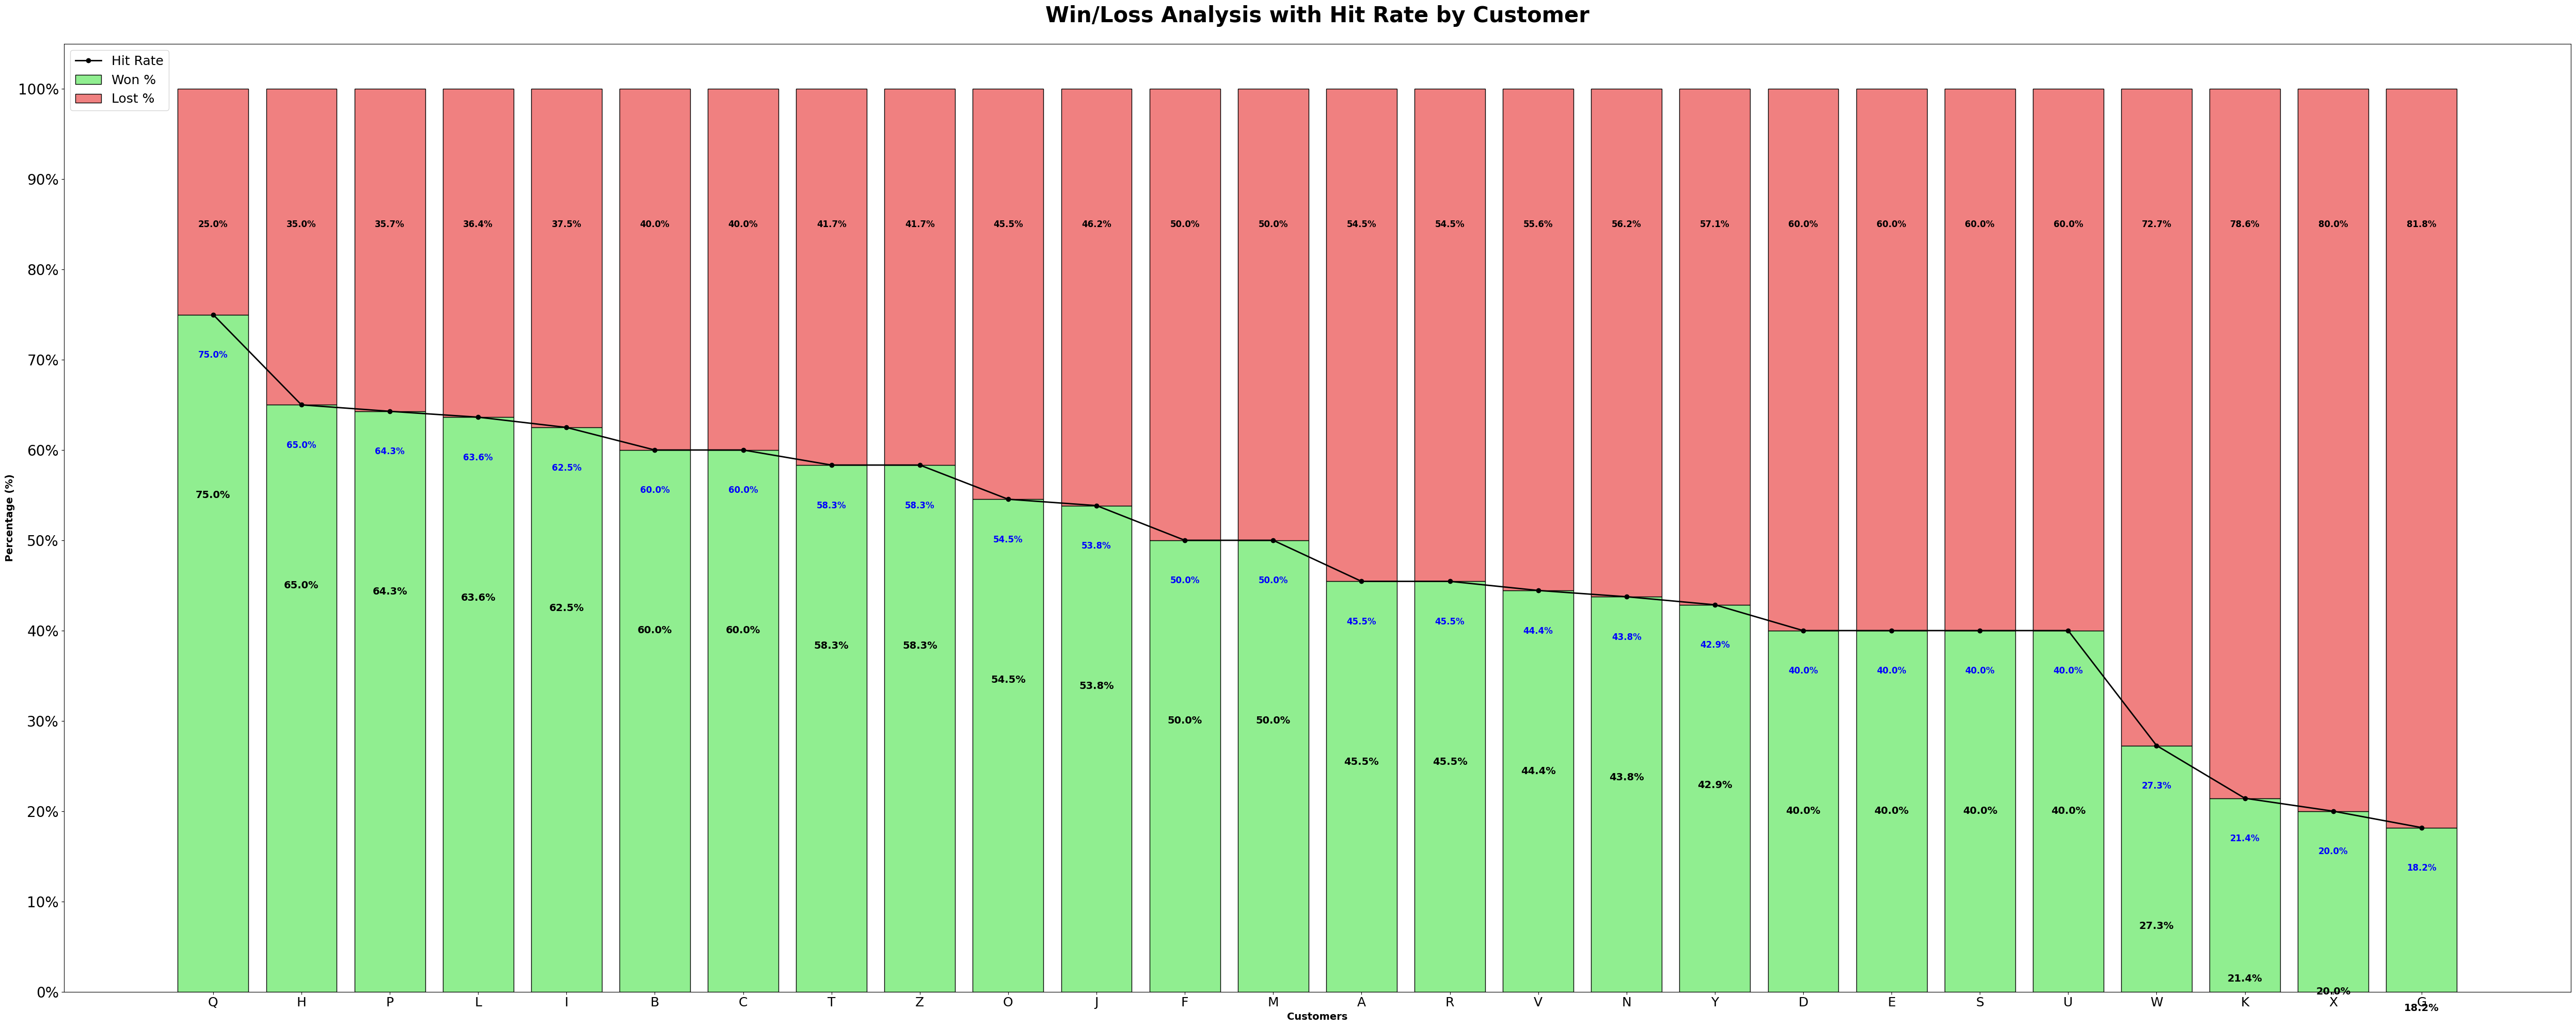

In [20]:
# Normalize the won and lost counts to percentages for stacked bar chart
total_counts = [won + lost for won, lost in zip(won_counts, lost_counts)]
won_percentages = [won / total * 100 if total != 0 else 0 for won, total in zip(won_counts, total_counts)]
lost_percentages = [lost / total * 100 if total != 0 else 0 for lost, total in zip(lost_counts, total_counts)]

# Set up the figure and axis with a larger size for readability
plt.figure(figsize=(50, 20))
x = np.arange(len(Customers))
bar_width = 6

# Create stacked bar chart for win/loss percentages
plt.bar(x, won_percentages, color='lightgreen', label='Won %', edgecolor='black')
plt.bar(x, lost_percentages, bottom=won_percentages, color='lightcoral', label='Lost %', edgecolor='black')

# Plot line chart for hit rates
plt.plot(x, hit_rates, color='black', marker='o', linestyle='-', linewidth=2, label='Hit Rate')

# Add text annotations for Won and Lost percentages
for i, (won, lost,rate) in enumerate(zip(won_percentages, lost_percentages,hit_rates)):
    plt.text(i, won  - 20 , f"{won:.1f}%", ha='center', va='center', color='black', fontweight='bold',fontsize=14)  # Won %
    plt.text(i, won + lost - 15, f"{lost:.1f}%", ha='center', va='center', color='black', fontweight='bold',fontsize=12)  # Lost %
    plt.text(i, rate -5, f"{rate:.1f}%", ha='center', va='bottom', color='blue', fontweight='bold',fontsize=12)


plt.xticks(x, Customers, fontsize=18)
plt.yticks(np.linspace(0, 100, 11), [f"{int(y)}%" for y in np.linspace(0, 100, 11)], fontsize=20)
plt.xlabel('Customers', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.title('Win/Loss Analysis with Hit Rate by Customer', fontsize=30, fontweight='bold', pad=30)
plt.legend(loc='upper left', fontsize=18)


plt.tight_layout()
plt.show()


In [21]:
New_Data.groupby("Sales Stage")["Reason"].value_counts()

Sales Stage     Reason                            
Lost            Price                                 21
                Technical issues                      20
                Competitors                           18
                Poor Customer Service/Relationship    18
                Regular Customer                      18
                Unknown                               17
                Incorrect Bid                         15
                DisQualified                          14
                Delivery Delays                       12
Under Progress  DisQualified                          21
                Technical issues                      20
                Delivery Delays                       19
                Competitors                           18
                Regular Customer                      16
                Unknown                               16
                Price                                 15
                Incorrect Bid        

# **Considering Hit Rate >30%**
                                                                
# **LOST**
    1.  Delivery Delay is the major reason for closing the bid. So we need to improve it from Factory end. (May be due to raw materials, Existing project, man power etc,.)
    2.  Technical issues may be we need to improve data quality  
    2.  Regular Customer lost order is more serious


**Solution**
   
    1. Unavailability of materials or factor being busy with other things.So we can consider this too
    2. To keep Price factor under control we can watch market for lesser Raw materials cost and stock them
    3. For existing customer, We need to focus on relationship, Service

# **WON**
    1.  Competitors is may be not upto our quality/pricing

**Needs Attention**

    1. Unknown reason need to explored with a survey conducted/ Feedback form to them and linking that to the data sysytem


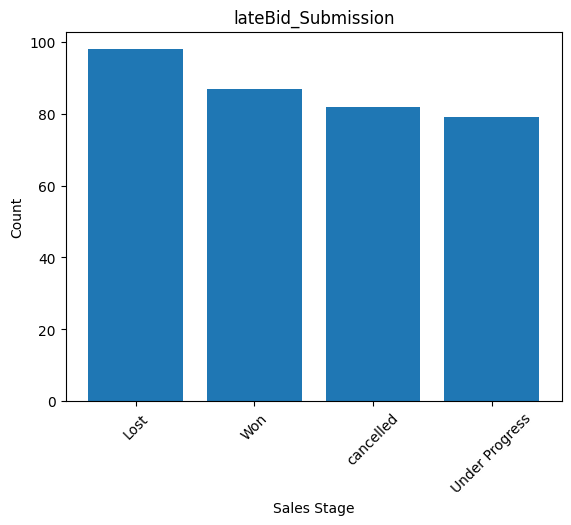

In [22]:
lateBid_Submission=New_Data[New_Data['Aging']<0]
Sales_count=lateBid_Submission['Sales Stage'].value_counts()
plt.bar(Sales_count.index,Sales_count)
plt.xticks(rotation=45)
plt.xlabel("Sales Stage")
plt.ylabel("Count")
plt.title("lateBid_Submission")
plt.show()

In [23]:
sales_Sta={'Lost':1,'Won':2,
           'cancelled':3,
           'Under Progress': 4
           }

New_Data['Sales Stage'].replace(sales_Sta,inplace=True)
New_Data.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date
0,E,301,792,3,3,Poor Customer Service/Relationship,46,16.65,2016-01-01,2015-11-08,2015-09-23
1,O,251,677,13,2,Poor Customer Service/Relationship,44,5.44,2016-01-01,2015-12-02,2015-10-19
2,M,231,632,1,4,Incorrect Bid,-22,5.67,2016-01-01,2015-11-14,2015-12-06
3,D,471,335,1,1,Price,-78,4.32,2016-01-03,2015-11-04,2016-01-21
4,M,361,231,14,1,Regular Customer,-24,11.39,2016-01-09,2015-11-16,2015-12-10


In [24]:

Analysing_Corr=copy.deepcopy(New_Data)
Analysing_Corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer Name           600 non-null    object        
 1   MVA                     600 non-null    int64         
 2   HV                      600 non-null    int64         
 3   Quantity                600 non-null    int64         
 4   Sales Stage             600 non-null    int64         
 5   Reason                  600 non-null    object        
 6   Aging                   600 non-null    int64         
 7   Total Sales             600 non-null    float64       
 8   Award Date              600 non-null    datetime64[ns]
 9   Requested Bidding Date  600 non-null    datetime64[ns]
 10  Actual Bidding Date     600 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(5), object(2)
memory usage: 51.7+ KB


In [25]:
lb=LabelEncoder()
Analysing_Corr['Reason']=lb.fit_transform(Analysing_Corr['Reason'])
Analysing_Corr.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date
0,E,301,792,3,3,4,46,16.65,2016-01-01,2015-11-08,2015-09-23
1,O,251,677,13,2,4,44,5.44,2016-01-01,2015-12-02,2015-10-19
2,M,231,632,1,4,3,-22,5.67,2016-01-01,2015-11-14,2015-12-06
3,D,471,335,1,1,5,-78,4.32,2016-01-03,2015-11-04,2016-01-21
4,M,361,231,14,1,6,-24,11.39,2016-01-09,2015-11-16,2015-12-10


In [26]:
scaler = StandardScaler()
numm=Analysing_Corr.select_dtypes(include=np.number).columns

for i in numm:
  Analysing_Corr[i] = scaler.fit_transform(Analysing_Corr[[i]])

Analysing_Corr.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date
0,E,0.301685,1.780934,-1.300540,0.445743,0.002583,1.553498,1.702476,2016-01-01,2015-11-08,2015-09-23
1,O,-0.054650,1.265796,0.448673,-0.442781,0.002583,1.500506,-0.682761,2016-01-01,2015-12-02,2015-10-19
2,M,-0.197184,1.064221,-1.650383,1.334267,-0.384910,-0.248222,-0.633822,2016-01-01,2015-11-14,2015-12-06
3,D,1.513222,-0.266177,-1.650383,-1.331306,0.390077,-1.731992,-0.921071,2016-01-03,2015-11-04,2016-01-21
4,M,0.729286,-0.732040,0.623595,-1.331306,0.777570,-0.301214,0.583266,2016-01-09,2015-11-16,2015-12-10


<Axes: >

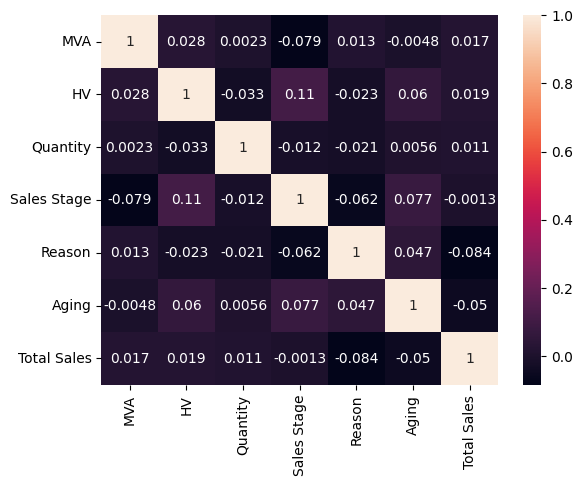

In [27]:
Correl=Analysing_Corr.select_dtypes(include=np.number).corr()
sns.heatmap(Correl,annot=True)

In [28]:
New_Data.columns

Index(['Customer Name', 'MVA', 'HV', 'Quantity', 'Sales Stage', 'Reason',
       'Aging', 'Total Sales', 'Award Date', 'Requested Bidding Date',
       'Actual Bidding Date'],
      dtype='object')

In [29]:
New_Data_copy=copy.deepcopy(New_Data.select_dtypes(include=['int64','float64'])).drop(['Sales Stage'],axis=1)
New_Data_copy.head()

,MVA,HV,Quantity,Aging,Total Sales
0,301,792,3,46,16.65
1,251,677,13,44,5.44
2,231,632,1,-22,5.67
3,471,335,1,-78,4.32
4,361,231,14,-24,11.39


                  MVA        HV  Quantity     Aging  Total Sales
MVA          1.000000  0.398016  0.369428  0.362586     0.356937
HV           0.398016  1.000000  0.384128  0.387369     0.370126
Quantity     0.369428  0.384128  1.000000  0.444449     0.427327
Aging        0.362586  0.387369  0.444449  1.000000     0.405090
Total Sales  0.356937  0.370126  0.427327  0.405090     1.000000


<Axes: >

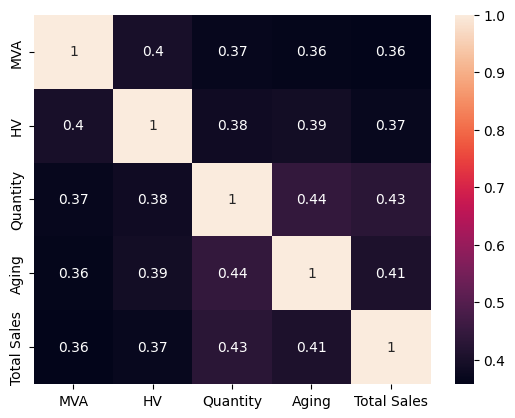

In [30]:
import numpy as np
import pandas as pd

New_Data_copy=copy.deepcopy(New_Data.select_dtypes(include=['int64','float64'])).drop(['Sales Stage'],axis=1)


num_col=[]
mean=[]
cov_matrix=[]
data=[]

# Extract numerical columns
num_col=New_Data_copy.select_dtypes(include=['int64','float64']).columns

# Generate a covariance matrix with moderate correlation
target_corr = 0.4  # Average desired correlation
n_features = len(num_col)
cov_matrix = np.full((n_features, n_features), target_corr)
np.fill_diagonal(cov_matrix, 1)  # Variance of 1 on the diagonal

# Generate multivariate data
mean = New_Data_copy.select_dtypes(include=['int64','float64']).mean().values
data = np.random.multivariate_normal(mean, cov_matrix, size=len(New_Data_copy))

# Replace columns with generated data
for i, column in enumerate(num_col):
    New_Data_copy[column] = data[:, i]

# Check correlations
correlations = New_Data_copy.corr()
print(correlations)
sns.heatmap(correlations,annot=True)

In [31]:
New_Data_copy['Total Sales'].value_counts()

Total Sales
9.614283    1
8.904764    1
8.997808    1
9.845762    1
7.334868    1
           ..
7.168547    1
8.659332    1
8.051646    1
7.261540    1
9.354683    1
Name: count, Length: 600, dtype: int64

** Approach is not working**

In [32]:
New_Data.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date
0,E,301,792,3,3,Poor Customer Service/Relationship,46,16.65,2016-01-01,2015-11-08,2015-09-23
1,O,251,677,13,2,Poor Customer Service/Relationship,44,5.44,2016-01-01,2015-12-02,2015-10-19
2,M,231,632,1,4,Incorrect Bid,-22,5.67,2016-01-01,2015-11-14,2015-12-06
3,D,471,335,1,1,Price,-78,4.32,2016-01-03,2015-11-04,2016-01-21
4,M,361,231,14,1,Regular Customer,-24,11.39,2016-01-09,2015-11-16,2015-12-10


In [33]:
# Take won orders alone for Forecasting

Transformer_data_sorted_won=New_Data[New_Data['Sales Stage']==2]
Transformer_data_sorted_won.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date
1,O,251,677,13,2,Poor Customer Service/Relationship,44,5.44,2016-01-01,2015-12-02,2015-10-19
5,O,490,517,18,2,DisQualified,-21,2.34,2016-01-10,2015-11-20,2015-12-11
13,H,16,799,7,2,Competitors,8,6.10,2016-02-08,2015-12-10,2015-12-02
18,H,335,191,18,2,Poor Customer Service/Relationship,-15,7.55,2016-02-23,2016-01-23,2016-02-07
26,Z,365,538,15,2,Regular Customer,-73,6.95,2016-03-29,2016-02-16,2016-04-29


In [34]:
Transformer_data_sorted_won.reset_index(inplace=True,drop=True)
Transformer_data_sorted_won.head()


,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date
0,O,251,677,13,2,Poor Customer Service/Relationship,44,5.44,2016-01-01,2015-12-02,2015-10-19
1,O,490,517,18,2,DisQualified,-21,2.34,2016-01-10,2015-11-20,2015-12-11
2,H,16,799,7,2,Competitors,8,6.10,2016-02-08,2015-12-10,2015-12-02
3,H,335,191,18,2,Poor Customer Service/Relationship,-15,7.55,2016-02-23,2016-01-23,2016-02-07
4,Z,365,538,15,2,Regular Customer,-73,6.95,2016-03-29,2016-02-16,2016-04-29


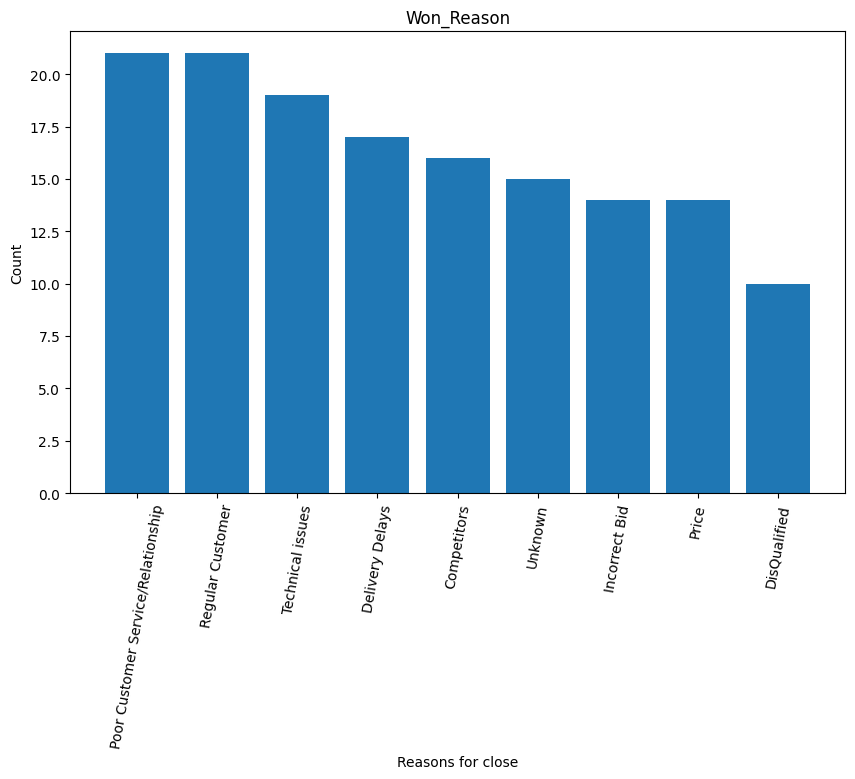

In [38]:
Won_Reason=Transformer_data_sorted_won['Reason'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(Won_Reason.index,Won_Reason)
plt.xticks(rotation=80)
plt.xlabel("Reasons for close")
plt.ylabel("Count")
plt.title("Won_Reason")
plt.show()

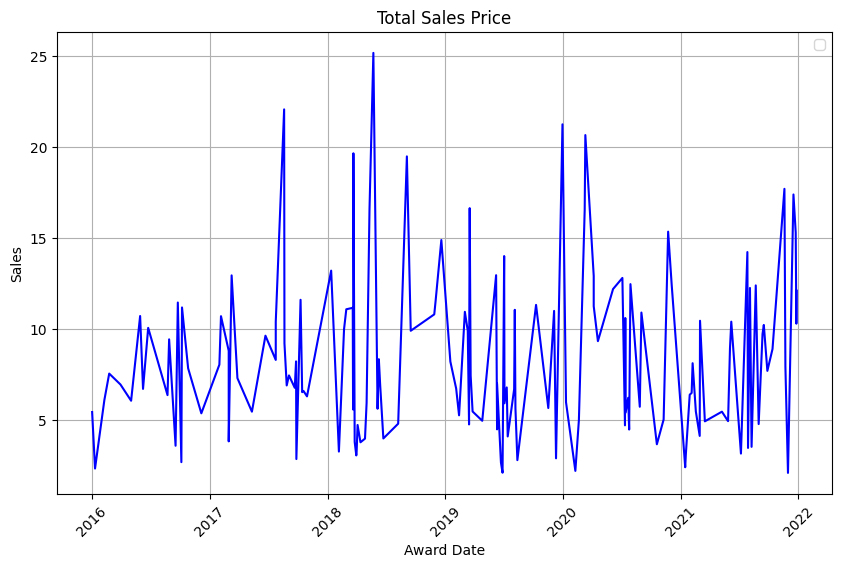

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(Transformer_data_sorted_won['Award Date'], Transformer_data_sorted_won['Total Sales'], color='blue')
plt.title('Total Sales Price')
plt.xlabel('Award Date')
plt.ylabel('Sales')
plt.grid(True)  # Optional: Add a grid
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [142]:
def HV_binning(spec):
  if  12.0 <= spec <= 22.0 :
    return 'HV-1'
  elif 22 < spec <= 33 :
    return 'HV-2'
  elif 33 < spec <= 66 :
    return 'HV-3'
  elif 66 < spec <= 100 :
    return 'HV-4'
  elif 100 < spec <= 130 :
    return 'HV-5'
  elif 130 <= spec <= 200 :
    return 'HV-6'
  elif 200 <= spec <= 300 :
    return 'HV-7'
  elif 300 <= spec <= 450 :
    return 'HV-8'
  elif 450 <= spec <= 800 :
    return 'HV-9'

In [143]:
Transformer_data_sorted_won['HV_bins']=Transformer_data_sorted_won['HV'].apply(HV_binning)
Transformer_data_sorted_won.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date,HV_bins
0,O,251,677,13,2,Poor Customer Service/Relationship,44,5.44,2016-01-01,2015-12-02,2015-10-19,HV-9
1,O,490,517,18,2,DisQualified,-21,2.34,2016-01-10,2015-11-20,2015-12-11,HV-9
2,H,16,799,7,2,Competitors,8,6.10,2016-02-08,2015-12-10,2015-12-02,HV-9
3,H,335,191,18,2,Poor Customer Service/Relationship,-15,7.55,2016-02-23,2016-01-23,2016-02-07,HV-6
4,Z,365,538,15,2,Regular Customer,-73,6.95,2016-03-29,2016-02-16,2016-04-29,HV-9


In [144]:
def MVA_binning(spec):
  if  11.0 <= spec <= 30.0 :
    return 'MVA-1'
  elif 30 < spec <= 60 :
    return 'MVA-2'
  elif 60 <= spec <= 80 :
    return 'MVA-3'
  elif 80 < spec <= 100 :
    return 'MVA-4'
  elif 100 < spec <= 150 :
    return 'MVA-5'
  elif 150 <= spec <= 200 :
    return 'MVA-6'
  elif 200 <= spec <= 400 :
    return 'MVA-7'
  elif spec >=400 :
    return 'MVA-8'

In [145]:
Transformer_data_sorted_won['MVA_bins']=Transformer_data_sorted_won['MVA'].apply(MVA_binning)
Transformer_data_sorted_won.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date,HV_bins,MVA_bins
0,O,251,677,13,2,Poor Customer Service/Relationship,44,5.44,2016-01-01,2015-12-02,2015-10-19,HV-9,MVA-7
1,O,490,517,18,2,DisQualified,-21,2.34,2016-01-10,2015-11-20,2015-12-11,HV-9,MVA-8
2,H,16,799,7,2,Competitors,8,6.10,2016-02-08,2015-12-10,2015-12-02,HV-9,MVA-1
3,H,335,191,18,2,Poor Customer Service/Relationship,-15,7.55,2016-02-23,2016-01-23,2016-02-07,HV-6,MVA-7
4,Z,365,538,15,2,Regular Customer,-73,6.95,2016-03-29,2016-02-16,2016-04-29,HV-9,MVA-7


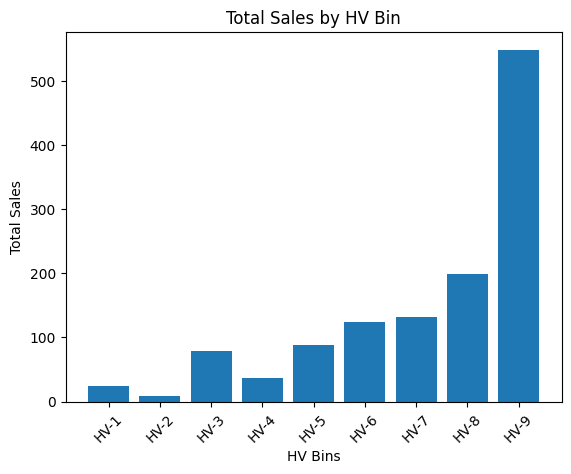

In [146]:
Sales_by_HVbin=Transformer_data_sorted_won.groupby("HV_bins")['Total Sales'].sum()
plt.bar(Sales_by_HVbin.index,Sales_by_HVbin)
plt.xlabel("HV Bins")
plt.ylabel("Total Sales")
plt.title("Total Sales by HV Bin")
plt.xticks(rotation=45)
plt.show()

In [147]:
Transformer_data_sorted_won.groupby("HV_bins")[['Quantity','Total Sales']].sum()

,Quantity,Total Sales
HV_bins,,
HV-1,29,24.39
HV-2,19,8.21
HV-3,80,78.09
HV-4,44,36.84
HV-5,94,88.42
HV-6,152,123.49
HV-7,218,131.71
HV-8,273,198.92
HV-9,718,548.84


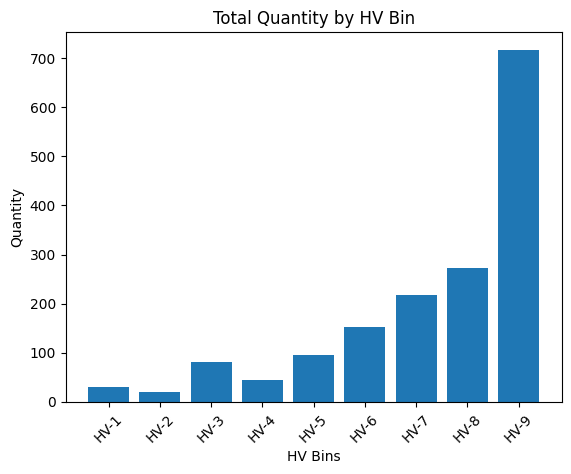

In [148]:
Sales_by_Quantity=Transformer_data_sorted_won.groupby("HV_bins")['Quantity'].sum()
plt.bar(Sales_by_Quantity.index,Sales_by_Quantity)
plt.xlabel("HV Bins")
plt.ylabel("Quantity")
plt.title("Total Quantity by HV Bin")
plt.xticks(rotation=45)
plt.show()

# Sales of Higher Voltage Products are high.

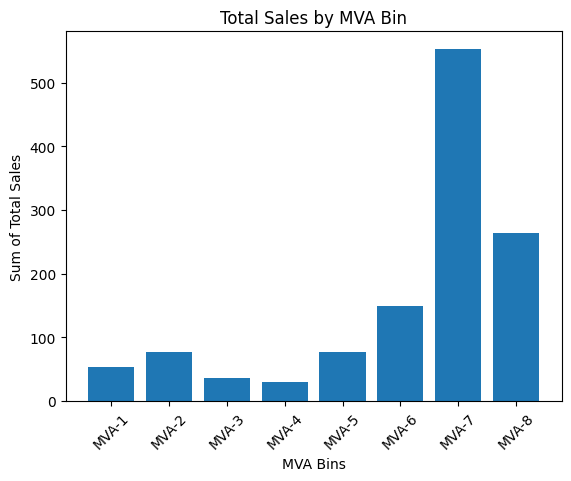

In [149]:
Sales_by_MVAbin=Transformer_data_sorted_won.groupby("MVA_bins")['Total Sales'].sum()
plt.bar(Sales_by_MVAbin.index,Sales_by_MVAbin)
plt.xlabel("MVA Bins")
plt.ylabel("Sum of Total Sales")
plt.title("Total Sales by MVA Bin")
plt.xticks(rotation=45)
plt.show()

In [150]:
Transformer_data_sorted_won.groupby("MVA_bins")[['Quantity','Total Sales']].sum()

,Quantity,Total Sales
MVA_bins,,
MVA-1,88,53.49
MVA-2,91,77.02
MVA-3,60,35.93
MVA-4,18,30.39
MVA-5,113,77.42
MVA-6,214,148.58
MVA-7,676,552.88
MVA-8,367,263.20


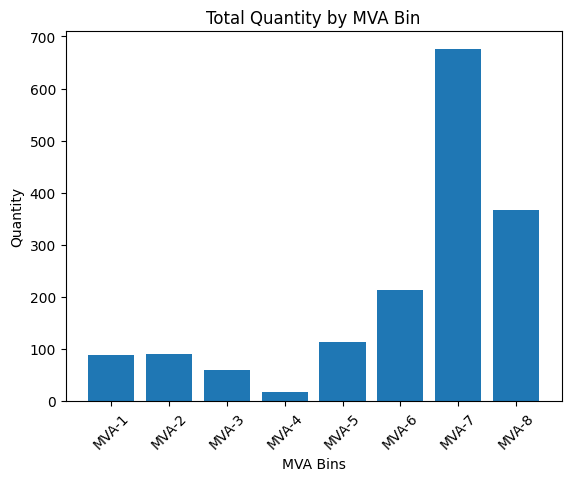

In [151]:
Sales_by_Quantity=Transformer_data_sorted_won.groupby("MVA_bins")['Quantity'].sum()
plt.bar(Sales_by_Quantity.index,Sales_by_Quantity)
plt.xlabel("MVA Bins")
plt.ylabel("Quantity")
plt.title("Total Quantity by MVA Bin")
plt.xticks(rotation=45)
plt.show()

# Sales of Higher MVA Products are high.

In [152]:
Transformer_data_sorted_won.shape

(147, 13)

In [153]:
Transformer_data_sorted_won.head()

,Customer Name,MVA,HV,Quantity,Sales Stage,Reason,Aging,Total Sales,Award Date,Requested Bidding Date,Actual Bidding Date,HV_bins,MVA_bins
0,O,251,677,13,2,Poor Customer Service/Relationship,44,5.44,2016-01-01,2015-12-02,2015-10-19,HV-9,MVA-7
1,O,490,517,18,2,DisQualified,-21,2.34,2016-01-10,2015-11-20,2015-12-11,HV-9,MVA-8
2,H,16,799,7,2,Competitors,8,6.10,2016-02-08,2015-12-10,2015-12-02,HV-9,MVA-1
3,H,335,191,18,2,Poor Customer Service/Relationship,-15,7.55,2016-02-23,2016-01-23,2016-02-07,HV-6,MVA-7
4,Z,365,538,15,2,Regular Customer,-73,6.95,2016-03-29,2016-02-16,2016-04-29,HV-9,MVA-7


In [154]:
# Drop Columns

Transformer_data_sorted_won.drop(["Sales Stage","Customer Name","MVA","HV","Requested Bidding Date","Actual Bidding Date","Reason"],axis=1,inplace=True)
Transformer_data_sorted_won.head()


,Quantity,Aging,Total Sales,Award Date,HV_bins,MVA_bins
0,13,44,5.44,2016-01-01,HV-9,MVA-7
1,18,-21,2.34,2016-01-10,HV-9,MVA-8
2,7,8,6.10,2016-02-08,HV-9,MVA-1
3,18,-15,7.55,2016-02-23,HV-6,MVA-7
4,15,-73,6.95,2016-03-29,HV-9,MVA-7


In [155]:
vc=Transformer_data_sorted_won['Award Date'].value_counts()
vc[vc>1]

Award Date
2019-06-11    2
2020-04-06    2
2019-03-16    2
2017-07-24    2
2017-02-28    2
Name: count, dtype: int64

In [156]:
df_HV=Transformer_data_sorted_won[['HV_bins', 'Total Sales','Award Date']]
df_HV.head()

,HV_bins,Total Sales,Award Date
0,HV-9,5.44,2016-01-01
1,HV-9,2.34,2016-01-10
2,HV-9,6.10,2016-02-08
3,HV-6,7.55,2016-02-23
4,HV-9,6.95,2016-03-29


In [157]:
df_MVA=Transformer_data_sorted_won[['MVA_bins', 'Total Sales','Award Date']]
df_MVA.head()

,MVA_bins,Total Sales,Award Date
0,MVA-7,5.44,2016-01-01
1,MVA-8,2.34,2016-01-10
2,MVA-1,6.10,2016-02-08
3,MVA-7,7.55,2016-02-23
4,MVA-7,6.95,2016-03-29


In [158]:
df_HV.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)
df_HV['HV_bins_encoded'] = df_HV['HV_bins'].astype('category').cat.codes
df_HV.drop("HV_bins",axis=1,inplace=True)
df_HV.head()

,y,ds,HV_bins_encoded
0,5.44,2016-01-01,8
1,2.34,2016-01-10,8
2,6.10,2016-02-08,8
3,7.55,2016-02-23,5
4,6.95,2016-03-29,8


In [159]:
df_HV.HV_bins_encoded.value_counts()

HV_bins_encoded
8    68
7    24
6    21
5    13
2     7
4     7
3     4
0     2
1     1
Name: count, dtype: int64

In [160]:
df_MVA.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)
df_MVA['MVA_bins_encoded'] = df_MVA['MVA_bins'].astype('category').cat.codes
df_MVA.drop("MVA_bins",axis=1,inplace=True)
df_MVA.head()

,y,ds,MVA_bins_encoded
0,5.44,2016-01-01,6
1,2.34,2016-01-10,7
2,6.10,2016-02-08,0
3,7.55,2016-02-23,6
4,6.95,2016-03-29,6


In [161]:
df_MVA.MVA_bins_encoded.value_counts()

MVA_bins_encoded
6    64
7    32
5    17
4    10
0     8
1     7
2     5
3     4
Name: count, dtype: int64

In [162]:
#Train test split

train_size_HV = int(len(df_HV) * 0.7)
train_HV = df_HV[:train_size_HV]
test_HV = df_HV[train_size_HV:]
print("Train size :",len(train_HV),"\nTest size :",len(test_HV))

Train size : 102 
Test size : 45


In [163]:
HV_5=df_HV[df_HV['HV_bins_encoded']==8]
HV_5.drop('HV_bins_encoded',axis=1,inplace=True)

HV_5=HV_5.groupby("ds").agg({
    'y':'sum'
})

HV_5 = HV_5.reset_index()
#HV_5.info()

HV_5['y'] = np.log1p(HV_5['y'])

train_size_HV_5 = int(len(HV_5) * 0.7)
train_HV_5 = HV_5[:train_size_HV_5]
test_HV_5 = HV_5[train_size_HV_5:]
print("Train size :",len(train_HV_5),"\nTest size :",len(test_HV_5))


Train size : 47 
Test size : 21


In [164]:

model_HV_5 = Prophet()
model_HV_5.fit(train_HV_5)


future = test_HV_5[['ds']].copy()          # dates are irregular and not daily data. So lets take the test Date itself
forecast = model_HV_5.predict(future)
forecast

18:28:35 - cmdstanpy - INFO - Chain [1] start processing
18:28:35 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-14,1.321210,1.884026,2.599330,1.321210,1.321210,0.929610,0.929610,0.929610,0.036343,0.036343,0.036343,0.893267,0.893267,0.893267,0.0,0.0,0.0,2.250820
1,2020-07-22,1.321085,2.054343,2.751380,1.321085,1.321085,1.095639,1.095639,1.095639,0.250318,0.250318,0.250318,0.845321,0.845321,0.845321,0.0,0.0,0.0,2.416725
2,2020-07-29,1.320977,1.990085,2.717448,1.320977,1.320977,1.049081,1.049081,1.049081,0.250318,0.250318,0.250318,0.798763,0.798763,0.798763,0.0,0.0,0.0,2.370058
3,2020-08-27,1.320526,1.982191,2.684784,1.320526,1.320526,1.021133,1.021133,1.021133,0.162046,0.162046,0.162046,0.859088,0.859088,0.859088,0.0,0.0,0.0,2.341659
4,2020-09-01,1.320448,1.940914,2.677168,1.320448,1.320448,0.982890,0.982890,0.982890,0.036343,0.036343,0.036343,0.946547,0.946547,0.946547,0.0,0.0,0.0,2.303338
5,2020-11-23,1.319157,2.566262,3.261104,1.319157,1.319157,1.590515,1.590515,1.590515,0.191062,0.191062,0.191062,1.399452,1.399452,1.399452,0.0,0.0,0.0,2.909672
6,2021-01-17,1.318302,1.041816,1.770240,1.318302,1.318302,0.088995,0.088995,0.088995,-0.425798,-0.425798,-0.425798,0.514793,0.514793,0.514793,0.0,0.0,0.0,1.407297
7,2021-02-17,1.317820,1.439372,2.142971,1.317820,1.317820,0.490150,0.490150,0.490150,0.250318,0.250318,0.250318,0.239832,0.239832,0.239832,0.0,0.0,0.0,1.807970
8,2021-05-09,1.316561,0.795804,1.521280,1.316561,1.316561,-0.177372,-0.177372,-0.177372,-0.425798,-0.425798,-0.425798,0.248426,0.248426,0.248426,0.0,0.0,0.0,1.139189
9,2021-06-07,1.316110,1.951407,2.670058,1.316110,1.316110,0.993630,0.993630,0.993630,0.191062,0.191062,0.191062,0.802567,0.802567,0.802567,0.0,0.0,0.0,2.309739


In [165]:
# Merge forecast with test data
test_HV_5 = pd.merge(forecast[['ds', 'yhat']], test_HV_5[['ds', 'y']], on='ds', how='inner')
test_HV_5

,ds,yhat,y
0,2020-07-14,2.250820,1.857859
1,2020-07-22,2.416725,1.976855
2,2020-07-29,2.370058,2.599722
3,2020-08-27,2.341659,1.906575
4,2020-09-01,2.303338,2.476538
5,2020-11-23,2.909672,2.793616
6,2021-01-17,1.407297,1.418277
7,2021-02-17,1.807970,1.867176
8,2021-05-09,1.139189,1.865629
9,2021-06-07,2.309739,2.433613


In [166]:
test_HV_5['y'] = np.expm1(test_HV_5['y'])  # De-log predictions
test_HV_5['yhat'] = np.expm1(test_HV_5['yhat'])

# Calculate metrics
mae = mean_absolute_error(test_HV_5['y'], test_HV_5['yhat'])
rmse = np.sqrt(mean_squared_error(test_HV_5['y'], test_HV_5['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


mape = np.mean(np.abs((test_HV_5['y'] - test_HV_5['yhat']) / test_HV_5['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 3.8900628159808575
Root Mean Squared Error (RMSE): 4.64562856166625
Mean Absolute Percentage Error (MAPE): 60.54119021923928%


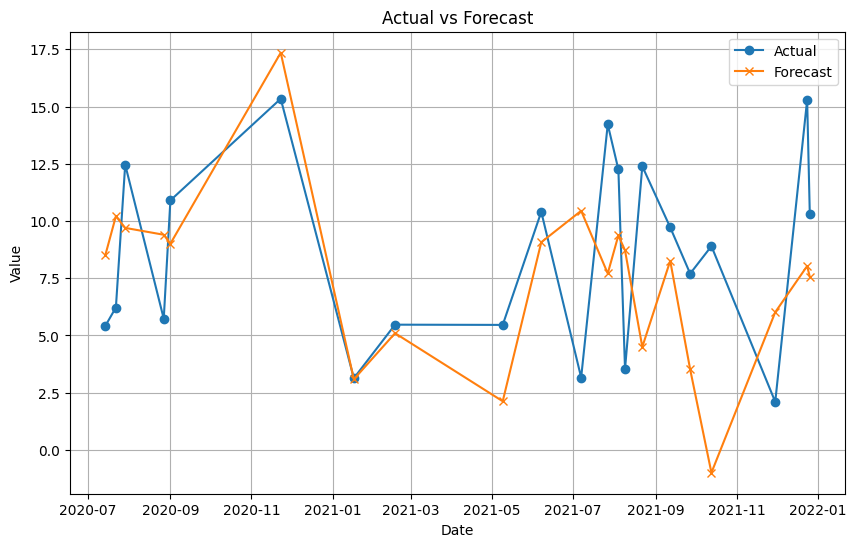

In [167]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_HV_5['ds'], test_HV_5['y'], label='Actual', marker='o')
plt.plot(test_HV_5['ds'], test_HV_5['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()


In [168]:
# Calculate metrics for training data
train_forecast = model_HV_5.predict(train_HV_5)
train_forecast['yhat'] = np.expm1(train_forecast['yhat'])  # Reverse log transformation

# Merge forecast with training data
train_HV_5 = pd.merge(train_forecast[['ds', 'yhat']], train_HV_5[['ds', 'y']], on='ds', how='inner')

# Calculate training metrics
train_mae = mean_absolute_error(train_HV_5['y'], train_HV_5['yhat'])
train_rmse = np.sqrt(mean_squared_error(train_HV_5['y'], train_HV_5['yhat']))

print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse}")

train_mape = np.mean(np.abs((train_HV_5['y'] - train_HV_5['yhat']) / train_HV_5['y'])) * 100
print(f"Train Mean Absolute Percentage Error (MAPE): {train_mape}%")


Train Mean Absolute Error (MAE): 5.469863325330621
Train Root Mean Squared Error (RMSE): 6.257045544300872
Train Mean Absolute Percentage Error (MAPE): 254.85924503727068%


Train size : 44 
Test size : 19


18:28:38 - cmdstanpy - INFO - Chain [1] start processing
18:28:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 21.092367637880113
Root Mean Squared Error (RMSE): 40.87780373996434
Mean Absolute Percentage Error (MAPE): 330.16705079286464%
Train Mean Absolute Error (MAE): 3782019.199597676
Train Root Mean Squared Error (RMSE): 16223117.408391565
Train Mean Absolute Percentage Error (MAPE): 18868937.47001651%


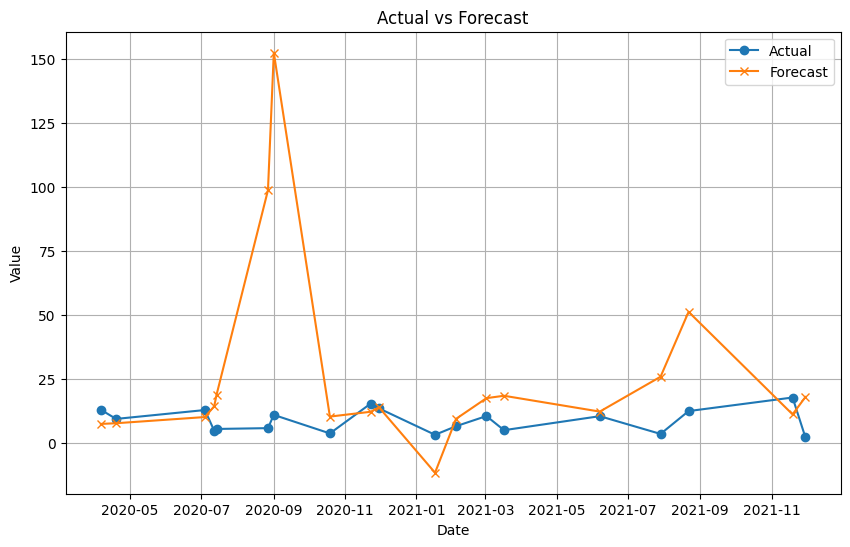

In [169]:

MVA_1=df_MVA[df_MVA['MVA_bins_encoded']==6]

MVA_1=MVA_1.groupby("ds").agg({
    'y':'sum'
})

MVA_1 = MVA_1.reset_index()

train_size_MVA_1 = int(len(MVA_1) * 0.7)
train_MVA_1= MVA_1[:train_size_MVA_1]
test_MVA_1= MVA_1[train_size_MVA_1:]
print("Train size :",len(train_MVA_1),"\nTest size :",len(test_MVA_1))

model_MVA_1 = Prophet()
model_MVA_1.fit(train_MVA_1)


future = test_MVA_1[['ds']].copy()          # dates are irregular and not daily data. So lets take the test Date itself
forecast = model_MVA_1.predict(future)
forecast



# Merge forecast with test data
test_MVA_1= pd.merge(forecast[['ds', 'yhat']], test_MVA_1[['ds', 'y']], on='ds', how='inner')
test_MVA_1

# Calculate metrics
mae = mean_absolute_error(test_MVA_1['y'], test_MVA_1['yhat'])
rmse = np.sqrt(mean_squared_error(test_MVA_1['y'], test_MVA_1['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


mape = np.mean(np.abs((test_MVA_1['y'] - test_MVA_1['yhat']) / test_MVA_1['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Predict on training data
train_forecast = model_MVA_1.predict(train_MVA_1)
train_forecast['yhat'] = np.expm1(train_forecast['yhat'])  # Reverse log transformation

# Merge forecast with training data
train_MVA_1 = pd.merge(train_forecast[['ds', 'yhat']], train_MVA_1[['ds', 'y']], on='ds', how='inner')

# Calculate training metrics
train_mae = mean_absolute_error(train_MVA_1['y'], train_MVA_1['yhat'])
train_rmse = np.sqrt(mean_squared_error(train_MVA_1['y'], train_MVA_1['yhat']))

print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse}")

train_mape = np.mean(np.abs((train_MVA_1['y'] - train_MVA_1['yhat']) / train_MVA_1['y'])) * 100
print(f"Train Mean Absolute Percentage Error (MAPE): {train_mape}%")



# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_MVA_1['ds'], test_MVA_1['y'], label='Actual', marker='o')
plt.plot(test_MVA_1['ds'], test_MVA_1['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()


Train size : 102 
Test size : 45


18:28:39 - cmdstanpy - INFO - Chain [1] start processing
18:28:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 4.938430018555577
Root Mean Squared Error (RMSE): 5.879615833510652
Mean Absolute Percentage Error (MAPE): 86.5638281573633%
Train Mean Absolute Error (MAE): 1021036.8271228726
Train Root Mean Squared Error (RMSE): 8326905.678284006
Train Mean Absolute Percentage Error (MAPE): 4910353.529501795%


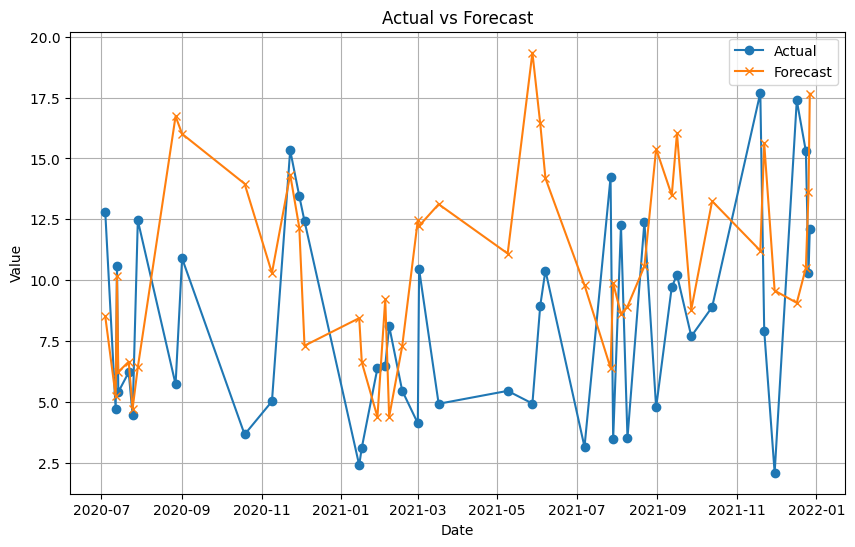

In [170]:

#MVA_1['y'] = np.log1p(MVA_1['y'])

train_size_MVA = int(len(df_MVA) * 0.7)
train_MVA= df_MVA[:train_size_MVA]
test_MVA= df_MVA[train_size_MVA:]
print("Train size :",len(train_MVA),"\nTest size :",len(test_MVA))

model_MVA = Prophet()
model_MVA.add_regressor('MVA_bins_encoded')
model_MVA.fit(train_MVA)


future = test_MVA[['ds']].copy()          # dates are irregular and not daily data. So lets take the test Date itself
future['MVA_bins_encoded'] = test_MVA['MVA_bins_encoded']
forecast = model_MVA.predict(future)
forecast



# Merge forecast with test data
test_MVA= pd.merge(forecast[['ds', 'yhat']], test_MVA[['ds', 'y']], on='ds', how='inner')
test_MVA

#test_MVA['y'] = np.expm1(test_MVA['y'])  # De-log predictions
#test_MVA['yhat'] = np.expm1(test_MVA['yhat'])

# Calculate metrics
mae = mean_absolute_error(test_MVA['y'], test_MVA['yhat'])
rmse = np.sqrt(mean_squared_error(test_MVA['y'], test_MVA['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


mape = np.mean(np.abs((test_MVA['y'] - test_MVA['yhat']) / test_MVA['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


# Predict on training data
train_forecast = model_MVA.predict(train_MVA)
train_forecast['yhat'] = np.expm1(train_forecast['yhat'])  # Reverse log transformation

# Merge forecast with training data
train_MVA = pd.merge(train_forecast[['ds', 'yhat']], train_MVA[['ds', 'y']], on='ds', how='inner')

# Calculate training metrics
train_mae = mean_absolute_error(train_MVA['y'], train_MVA['yhat'])
train_rmse = np.sqrt(mean_squared_error(train_MVA['y'], train_MVA['yhat']))

print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse}")

train_mape = np.mean(np.abs((train_MVA['y'] - train_MVA['yhat']) / train_MVA['y'])) * 100
print(f"Train Mean Absolute Percentage Error (MAPE): {train_mape}%")



# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_MVA['ds'], test_MVA['y'], label='Actual', marker='o')
plt.plot(test_MVA['ds'], test_MVA['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()


Train size : 102 
Test size : 45


18:28:40 - cmdstanpy - INFO - Chain [1] start processing
18:28:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 17158649.230992753
Root Mean Squared Error (RMSE): 67632734.365546
Mean Absolute Percentage Error (MAPE): 6691527.662657845%
Train Mean Absolute Error (MAE): 3210767.5959613323
Train Root Mean Squared Error (RMSE): 24915743.750362463
Train Mean Absolute Percentage Error (MAPE): 17637211.451191124%


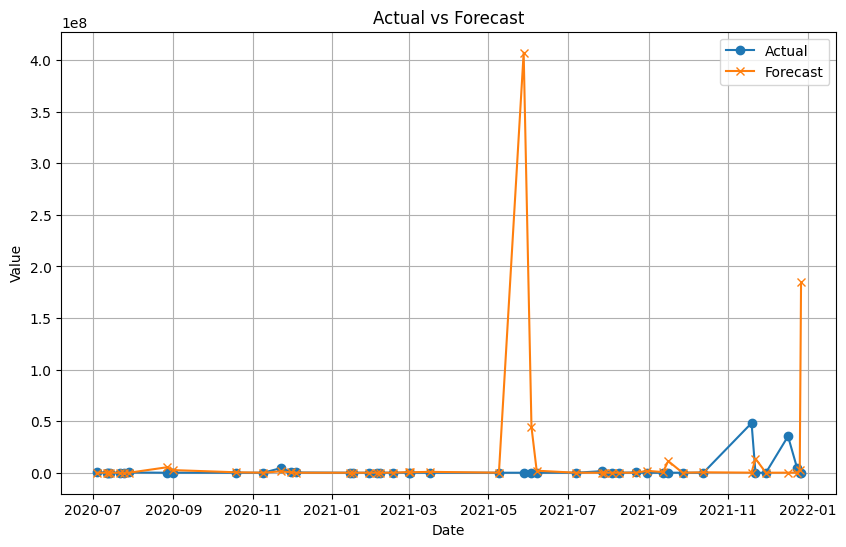

In [171]:
Prophet_Sales=copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.head()

Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins",axis=1,inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins",axis=1,inplace=True)



HV_5['y'] = np.log1p(HV_5['y'])

train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS= Prophet_Sales[:train_size_PS]
test_PS= Prophet_Sales[train_size_PS:]
print("Train size :",len(train_PS),"\nTest size :",len(test_PS))

model_PS = Prophet()
model_PS.add_regressor('MVA_bins_encoded')
model_PS.add_regressor('HV_bins_encoded')
model_PS.add_regressor('Quantity')
model_PS.fit(train_PS)


future = test_PS[['ds']].copy()          # dates are irregular and not daily data. So lets take the test Date itself
future['MVA_bins_encoded'] = test_PS['MVA_bins_encoded'].copy()
future['HV_bins_encoded'] = test_PS['HV_bins_encoded'].copy()
future['Quantity'] = test_PS['Quantity'].copy()
forecast = model_PS.predict(future)
forecast



# Merge forecast with test data
test_PS= pd.merge(forecast[['ds', 'yhat']], test_PS[['ds', 'y']], on='ds', how='inner')
test_PS


test_PS['y'] = np.expm1(test_PS['y'])  # De-log predictions
test_PS['yhat'] = np.expm1(test_PS['yhat'])


# Calculate metrics
mae = mean_absolute_error(test_PS['y'], test_PS['yhat'])
rmse = np.sqrt(mean_squared_error(test_PS['y'], test_PS['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


mape = np.mean(np.abs((test_PS['y'] - test_PS['yhat']) / test_PS['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")




# Predict on training data
train_forecast = model_PS.predict(train_PS)
train_forecast['yhat'] = np.expm1(train_forecast['yhat'])  # Reverse log transformation

# Merge forecast with training data
train_PS = pd.merge(train_forecast[['ds', 'yhat']], train_PS[['ds', 'y']], on='ds', how='inner')

# Calculate training metrics
train_mae = mean_absolute_error(train_PS['y'], train_PS['yhat'])
train_rmse = np.sqrt(mean_squared_error(train_PS['y'], train_PS['yhat']))

print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse}")

train_mape = np.mean(np.abs((train_PS['y'] - train_PS['yhat']) / train_PS['y'])) * 100
print(f"Train Mean Absolute Percentage Error (MAPE): {train_mape}%")


# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_PS['ds'], test_PS['y'], label='Actual', marker='o')
plt.plot(test_PS['ds'], test_PS['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()


In [172]:

Prophet_Sales=copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.head()

Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins",axis=1,inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins",axis=1,inplace=True)


scaler_PS = StandardScaler()
numm_PS=Prophet_Sales.drop("y",axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
  Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

Prophet_Sales.head()


,Quantity,Aging,y,ds,HV_bins_encoded,MVA_bins_encoded
0,0.346752,1.596667,5.44,2016-01-01,0.771818,0.414543
1,1.244157,-0.167662,2.34,2016-01-10,0.771818,0.922358
2,-0.730133,0.619500,6.10,2016-02-08,0.771818,-2.632348
3,1.244157,-0.004801,7.55,2016-02-23,-0.789520,0.414543
4,0.705714,-1.579125,6.95,2016-03-29,0.771818,0.414543


Train size : 102 
Test size : 45


18:28:42 - cmdstanpy - INFO - Chain [1] start processing
18:28:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 4.869548903723021
Root Mean Squared Error (RMSE): 5.769226361266708
Mean Absolute Percentage Error (MAPE): 84.49162918525555%
Train Mean Absolute Error (MAE): 3198486.379170533
Train Root Mean Squared Error (RMSE): 24758032.602592826
Train Mean Absolute Percentage Error (MAPE): 17542359.56407194%


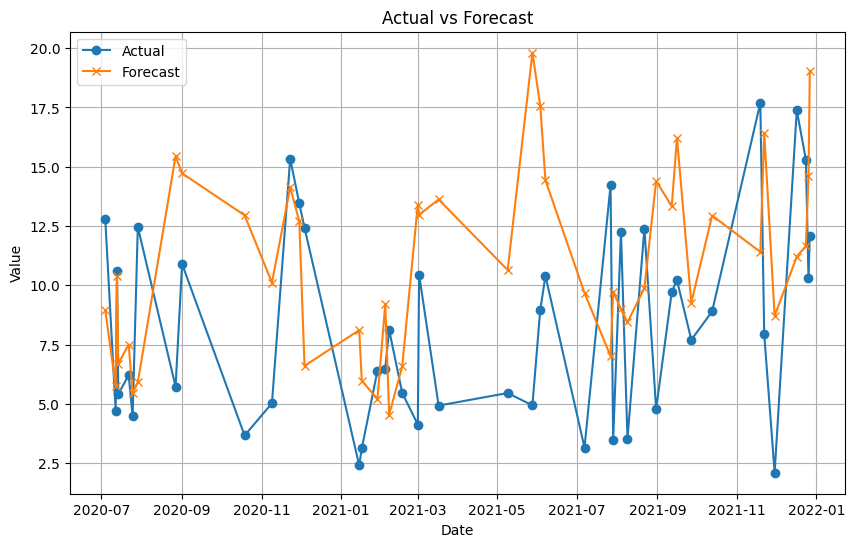

In [173]:
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS= Prophet_Sales[:train_size_PS]
test_PS= Prophet_Sales[train_size_PS:]
print("Train size :",len(train_PS),"\nTest size :",len(test_PS))

model_PS = Prophet()
model_PS.add_regressor('MVA_bins_encoded')
model_PS.add_regressor('HV_bins_encoded')
model_PS.add_regressor('Quantity')
model_PS.fit(train_PS)


future = test_PS[['ds']].copy()          # dates are irregular and not daily data. So lets take the test Date itself
future['MVA_bins_encoded'] = test_PS['MVA_bins_encoded'].copy()
future['HV_bins_encoded'] = test_PS['HV_bins_encoded'].copy()
future['Quantity'] = test_PS['Quantity'].copy()
forecast = model_PS.predict(future)
forecast

# Merge forecast with test data
test_PS= pd.merge(forecast[['ds', 'yhat']], test_PS[['ds', 'y']], on='ds', how='inner')
test_PS

# Calculate metrics
mae = mean_absolute_error(test_PS['y'], test_PS['yhat'])
rmse = np.sqrt(mean_squared_error(test_PS['y'], test_PS['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


mape = np.mean(np.abs((test_PS['y'] - test_PS['yhat']) / test_PS['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")



# Predict on training data
train_forecast = model_PS.predict(train_PS)
train_forecast['yhat'] = np.expm1(train_forecast['yhat'])  # Reverse log transformation

# Merge forecast with training data
train_PS = pd.merge(train_forecast[['ds', 'yhat']], train_PS[['ds', 'y']], on='ds', how='inner')

# Calculate training metrics
train_mae = mean_absolute_error(train_PS['y'], train_PS['yhat'])
train_rmse = np.sqrt(mean_squared_error(train_PS['y'], train_PS['yhat']))

print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse}")

train_mape = np.mean(np.abs((train_PS['y'] - train_PS['yhat']) / train_PS['y'])) * 100
print(f"Train Mean Absolute Percentage Error (MAPE): {train_mape}%")



# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_PS['ds'], test_PS['y'], label='Actual', marker='o')
plt.plot(test_PS['ds'], test_PS['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()



In [174]:
Prophet_Sales=copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.head()

Prophet_Sales.rename(columns={'Expected Award Date': 'ds', 'Sum of Total Sales Price (USD)': 'y'}, inplace=True)
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins",axis=1,inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins",axis=1,inplace=True)

print(Prophet_Sales.select_dtypes(include=np.number).skew())

# Log transformation to handle skewness
Prophet_Sales['Total Sales'] = np.log1p(Prophet_Sales['Total Sales'])
Prophet_Sales['HV_bins_encoded'] = np.log1p(Prophet_Sales['HV_bins_encoded'])
Prophet_Sales['MVA_bins_encoded'] = np.log1p(Prophet_Sales['MVA_bins_encoded'])
# Check for skewness
print(Prophet_Sales.select_dtypes(include=np.number).skew())

Quantity           -0.111001
Aging               0.009208
Total Sales         1.067378
HV_bins_encoded    -1.430153
MVA_bins_encoded   -1.458095
dtype: float64
Quantity           -0.111001
Aging               0.009208
Total Sales        -0.018491
HV_bins_encoded    -2.761719
MVA_bins_encoded   -2.238281
dtype: float64


Quantity           -0.111001
Aging               0.009208
y                   1.067378
HV_bins_encoded    -1.430153
MVA_bins_encoded   -1.458095
dtype: float64
Train size : 102 
Test size : 45


18:28:47 - cmdstanpy - INFO - Chain [1] start processing
18:28:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 4.869548903723021
Root Mean Squared Error (RMSE): 5.769226361266708
Mean Absolute Percentage Error (MAPE): 84.49162918525555%
Train Mean Absolute Error (MAE): 3198486.379170533
Train Root Mean Squared Error (RMSE): 24758032.602592826
Train Mean Absolute Percentage Error (MAPE): 17542359.56407194%


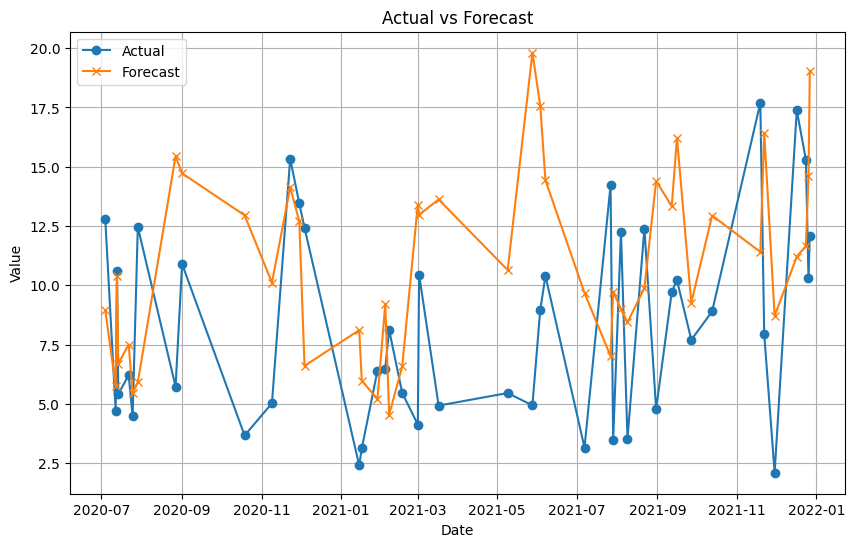

In [175]:
Prophet_Sales=copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.head()

Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins",axis=1,inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins",axis=1,inplace=True)


# Check for skewness
print(Prophet_Sales.drop('ds', axis=1).skew())


scaler_PS = StandardScaler()
numm_PS=Prophet_Sales.drop("y",axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
  Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

Prophet_Sales.head()



train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS= Prophet_Sales[:train_size_PS]
test_PS= Prophet_Sales[train_size_PS:]
print("Train size :",len(train_PS),"\nTest size :",len(test_PS))

model_PS_1 = Prophet()
model_PS_1.add_regressor('MVA_bins_encoded')
model_PS_1.add_regressor('HV_bins_encoded')
model_PS_1.add_regressor('Quantity')
model_PS_1.fit(train_PS)


future_1 = test_PS[['ds']].copy()          # dates are irregular and not daily data. So lets take the test Date itself
future_1['MVA_bins_encoded'] = test_PS['MVA_bins_encoded'].copy()
future_1['HV_bins_encoded'] = test_PS['HV_bins_encoded'].copy()
future_1['Quantity'] = test_PS['Quantity'].copy()
forecast = model_PS.predict(future_1)
forecast

# Merge forecast with test data
test_PS= pd.merge(forecast[['ds', 'yhat']], test_PS[['ds', 'y']], on='ds', how='inner')
test_PS

# Calculate metrics
mae = mean_absolute_error(test_PS['y'], test_PS['yhat'])
rmse = np.sqrt(mean_squared_error(test_PS['y'], test_PS['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


mape = np.mean(np.abs((test_PS['y'] - test_PS['yhat']) / test_PS['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Predict on training data
train_forecast = model_PS_1.predict(train_PS)
train_forecast['yhat'] = np.expm1(train_forecast['yhat'])  # Reverse log transformation

# Merge forecast with training data
train_PS = pd.merge(train_forecast[['ds', 'yhat']], train_PS[['ds', 'y']], on='ds', how='inner')

# Calculate training metrics
train_mae = mean_absolute_error(train_PS['y'], train_PS['yhat'])
train_rmse = np.sqrt(mean_squared_error(train_PS['y'], train_PS['yhat']))

print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse}")

train_mape = np.mean(np.abs((train_PS['y'] - train_PS['yhat']) / train_PS['y'])) * 100
print(f"Train Mean Absolute Percentage Error (MAPE): {train_mape}%")


# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_PS['ds'], test_PS['y'], label='Actual', marker='o')
plt.plot(test_PS['ds'], test_PS['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()


Train size : 102 
Test size : 45


18:28:56 - cmdstanpy - INFO - Chain [1] start processing
18:28:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 4.869548903723021
Root Mean Squared Error (RMSE): 5.769226361266708
Mean Absolute Percentage Error (MAPE): 84.49162918525555%
Train Mean Absolute Error (MAE): 2.8969599905396657
Train Root Mean Squared Error (RMSE): 3.581096330413374
Train Mean Absolute Percentage Error (MAPE): 44.55821019842388%


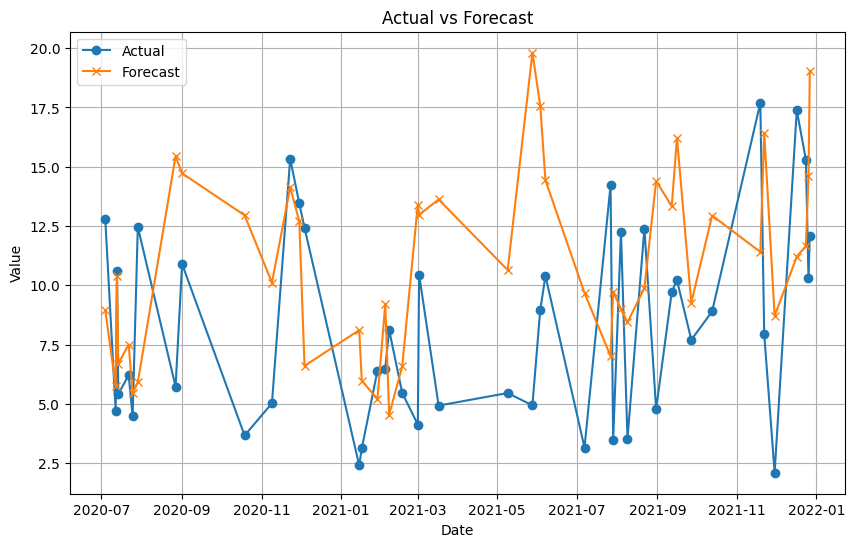

In [176]:
Prophet_Sales=copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.head()

Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins",axis=1,inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins",axis=1,inplace=True)



scaler_PS = StandardScaler()
numm_PS=Prophet_Sales.drop("y",axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
  Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

Prophet_Sales.head()



train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS= Prophet_Sales[:train_size_PS]
test_PS= Prophet_Sales[train_size_PS:]
print("Train size :",len(train_PS),"\nTest size :",len(test_PS))

model_PS_11 = Prophet()
model_PS_11.add_regressor('MVA_bins_encoded')
model_PS_11.add_regressor('HV_bins_encoded')
model_PS_11.add_regressor('Quantity')
model_PS_11.fit(train_PS)


future_11 = test_PS[['ds']].copy()          # dates are irregular and not daily data. So lets take the test Date itself
future_11['MVA_bins_encoded'] = test_PS['MVA_bins_encoded'].copy()
future_11['HV_bins_encoded'] = test_PS['HV_bins_encoded'].copy()
future_11['Quantity'] = test_PS['Quantity'].copy()
forecast = model_PS.predict(future_11)
forecast



# Merge forecast with test data
test_PS= pd.merge(forecast[['ds', 'yhat']], test_PS[['ds', 'y']], on='ds', how='inner')
test_PS

# Calculate metrics
mae = mean_absolute_error(test_PS['y'], test_PS['yhat'])
rmse = np.sqrt(mean_squared_error(test_PS['y'], test_PS['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


mape = np.mean(np.abs((test_PS['y'] - test_PS['yhat']) / test_PS['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")



# Predict on training data
train_forecast = model_PS_11.predict(train_PS)

# Merge forecast with training data
train_PS = pd.merge(train_forecast[['ds', 'yhat']], train_PS[['ds', 'y']], on='ds', how='inner')

# Calculate training metrics
train_mae = mean_absolute_error(train_PS['y'], train_PS['yhat'])
train_rmse = np.sqrt(mean_squared_error(train_PS['y'], train_PS['yhat']))

print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse}")

train_mape = np.mean(np.abs((train_PS['y'] - train_PS['yhat']) / train_PS['y'])) * 100
print(f"Train Mean Absolute Percentage Error (MAPE): {train_mape}%")


# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_PS['ds'], test_PS['y'], label='Actual', marker='o')
plt.plot(test_PS['ds'], test_PS['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()




Train size : 102 
Test size : 45


18:29:04 - cmdstanpy - INFO - Chain [1] start processing
18:29:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 4.869548903723021
Root Mean Squared Error (RMSE): 5.769226361266708
Mean Absolute Percentage Error (MAPE): 84.49162918525555%
Train Mean Absolute Error (MAE): 2.728123745259565
Train Root Mean Squared Error (RMSE): 3.4360401438839445
Train Mean Absolute Percentage Error (MAPE): 41.06585402960197%


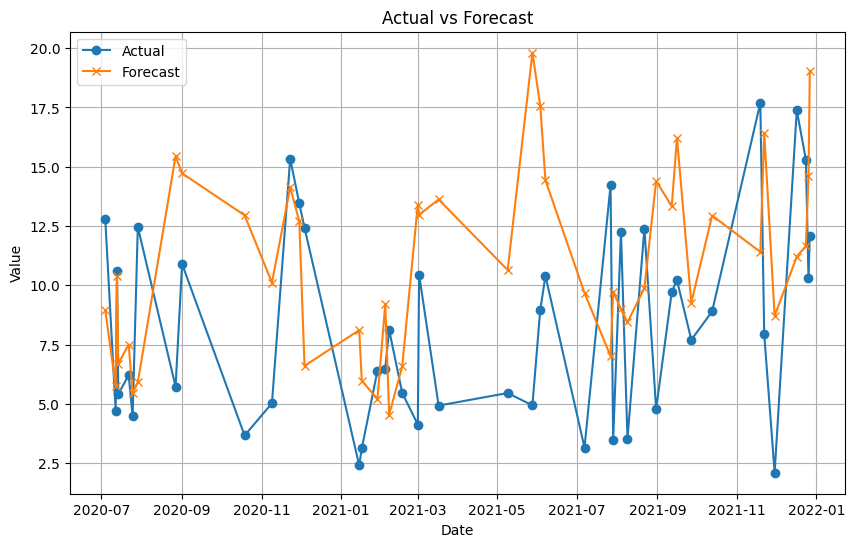

In [177]:
Prophet_Sales=copy.deepcopy(Transformer_data_sorted_won)

Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

Prophet_Sales['Month']=Prophet_Sales['ds'].dt.month
Prophet_Sales['Year']=Prophet_Sales['ds'].dt.year
Prophet_Sales['Week']=Prophet_Sales['ds'].dt.weekday
Prophet_Sales['Quater']=Prophet_Sales['ds'].dt.quarter
Prophet_Sales.head()

Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins",axis=1,inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins",axis=1,inplace=True)

scaler_PS = StandardScaler()
numm_PS=Prophet_Sales.drop(["y",'Month','Year','Quater','Week'],axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
  Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

Prophet_Sales.head()


train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS= Prophet_Sales[:train_size_PS]
test_PS= Prophet_Sales[train_size_PS:]
print("Train size :",len(train_PS),"\nTest size :",len(test_PS))

model_PS_1 = Prophet()
model_PS_1.add_regressor('MVA_bins_encoded')
model_PS_1.add_regressor('HV_bins_encoded')
model_PS_1.add_regressor('Quantity')
model_PS_1.add_regressor('Month')
model_PS_1.add_regressor('Year')
model_PS_1.add_regressor('Quater')
model_PS_1.add_regressor('Week')
model_PS_1.fit(train_PS)


future_1 = test_PS[['ds']].copy()          # dates are irregular and not daily data. So lets take the test Date itself
future_1['MVA_bins_encoded'] = test_PS['MVA_bins_encoded'].copy()
future_1['HV_bins_encoded'] = test_PS['HV_bins_encoded'].copy()
future_1['Quantity'] = test_PS['Quantity'].copy()
future_1['Month'] = test_PS['Month'].copy()
future_1['Year'] = test_PS['Year'].copy()
future_1['Quater'] = test_PS['Quater'].copy()
future_1['Week'] = test_PS['Week'].copy()
forecast = model_PS.predict(future_1)
forecast



# Merge forecast with test data
test_PS= pd.merge(forecast[['ds', 'yhat']], test_PS[['ds', 'y']], on='ds', how='inner')
test_PS

# Calculate metrics
mae = mean_absolute_error(test_PS['y'], test_PS['yhat'])
rmse = np.sqrt(mean_squared_error(test_PS['y'], test_PS['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


mape = np.mean(np.abs((test_PS['y'] - test_PS['yhat']) / test_PS['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


# Predict on training data
train_forecast = model_PS_1.predict(train_PS)

# Merge forecast with training data
train_PS = pd.merge(train_forecast[['ds', 'yhat']], train_PS[['ds', 'y']], on='ds', how='inner')

# Calculate training metrics
train_mae = mean_absolute_error(train_PS['y'], train_PS['yhat'])
train_rmse = np.sqrt(mean_squared_error(train_PS['y'], train_PS['yhat']))

print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse}")

train_mape = np.mean(np.abs((train_PS['y'] - train_PS['yhat']) / train_PS['y'])) * 100
print(f"Train Mean Absolute Percentage Error (MAPE): {train_mape}%")



# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_PS['ds'], test_PS['y'], label='Actual', marker='o')
plt.plot(test_PS['ds'], test_PS['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()





Train size : 102 
Test size : 45
Naïve Forecast - MAE: 4.9382222222222225, RMSE: 6.197832596068475, MAPE: 80.99623012862608%


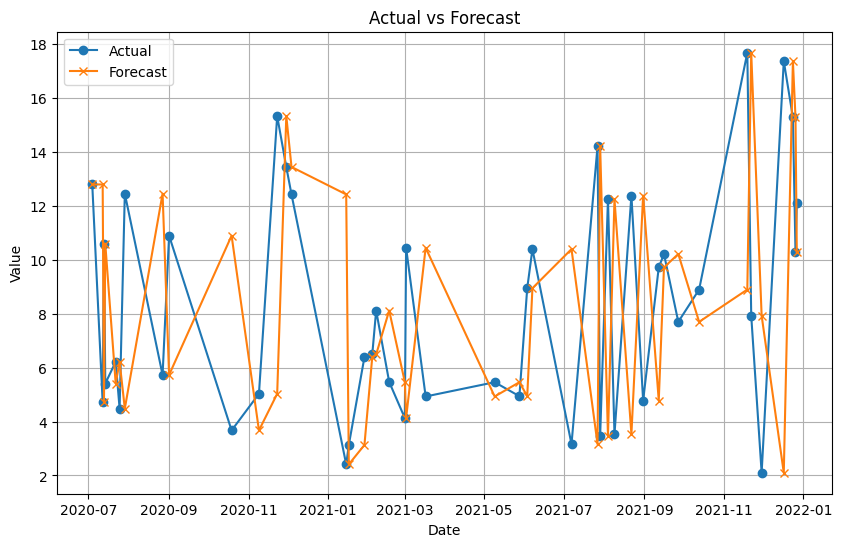

In [178]:
# Naïve Forecast: use the last observed value
Prophet_Sales=copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.head()

Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins",axis=1,inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins",axis=1,inplace=True)

scaler_PS = StandardScaler()
numm_PS=Prophet_Sales.drop("y",axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
  Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

Prophet_Sales.head()

train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS= Prophet_Sales[:train_size_PS]
test_PS= Prophet_Sales[train_size_PS:]
print("Train size :",len(train_PS),"\nTest size :",len(test_PS))

naive_forecast = test_PS['y'].shift(1)  # Shift values to create forecast
naive_forecast = naive_forecast.fillna(method='bfill')  # Handle first NaN

# Evaluate performance
naive_mae = mean_absolute_error(test_PS['y'], naive_forecast)
naive_rmse = mean_squared_error(test_PS['y'], naive_forecast, squared=False)
naive_mape = (abs(test_PS['y'] - naive_forecast) / test_PS['y']).mean() * 100

print(f"Naïve Forecast - MAE: {naive_mae}, RMSE: {naive_rmse}, MAPE: {naive_mape}%")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_PS['ds'], test_PS['y'], label='Actual', marker='o')
plt.plot(test_PS['ds'], naive_forecast, label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()


Train size : 102 
Test size : 45
RandomForestt - MAE: 4.673875555555562, RMSE: 5.620003824553866, MAPE: 99.31836847243865%
Training Metrics:
RandomForest - Train MAE: 1.31200588235294, Train RMSE: 1.7139073580449955, Train MAPE: 20.681153902643384%


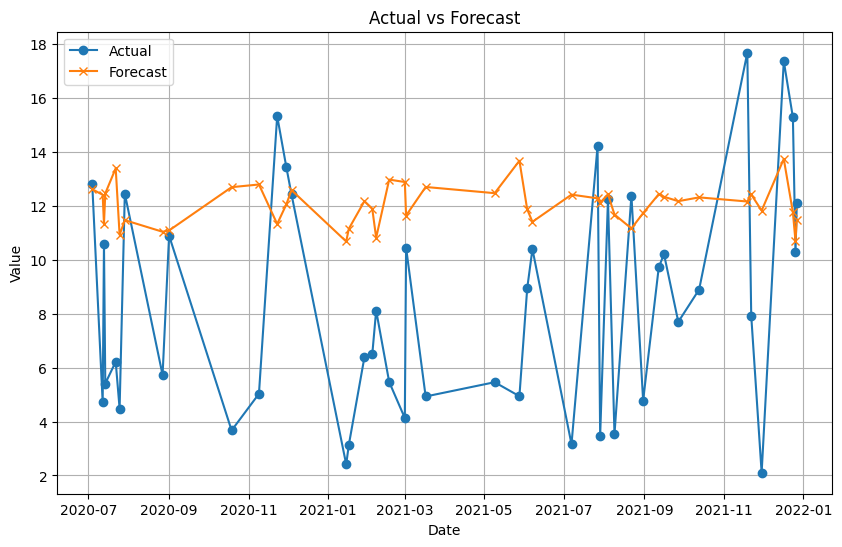

In [186]:
from sklearn.ensemble import RandomForestRegressor

Prophet_Sales=copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.head()

Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins",axis=1,inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins",axis=1,inplace=True)


scaler_PS = StandardScaler()
numm_PS=Prophet_Sales.drop("y",axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
  Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

Prophet_Sales.head()

train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS= Prophet_Sales[:train_size_PS]
test_PS= Prophet_Sales[train_size_PS:]
print("Train size :",len(train_PS),"\nTest size :",len(test_PS))

# Ensure 'ds' is properly transformed
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Train RandomForest with regressor
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']              # Target

X_test = test_PS.drop("y", axis=1)   # Features for testing
y_test = test_PS['y']                # True target values for testing

# Fit the RandomForest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)


# Evaluate performance
RF_mae = mean_absolute_error(y_test, y_pred)
RF_rmse = mean_squared_error(y_test, y_pred, squared=False)
RF_mape = (abs((y_test - y_pred)) /y_test).mean() * 100

print(f"RandomForestt - MAE: {RF_mae}, RMSE: {RF_rmse}, MAPE: {RF_mape}%")

# Predict on training data
y_train_pred = rf.predict(X_train)

# Evaluate performance on training data
train_RF_mae = mean_absolute_error(y_train, y_train_pred)
train_RF_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_RF_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Metrics:")
print(f"RandomForest - Train MAE: {train_RF_mae}, Train RMSE: {train_RF_rmse}, Train MAPE: {train_RF_mape}%")


# Plot
plt.figure(figsize=(10, 6))
plt.plot(Prophet_Sales[train_size_PS:] ['ds'], y_test, label='Actual', marker='o')
plt.plot(Prophet_Sales[train_size_PS:] ['ds'], y_pred, label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()



In [189]:
feature_importances = rf.feature_importances_
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Quantity, Importance: 0.14409841948199523
Feature: Aging, Importance: 0.3214471668567433
Feature: ds, Importance: 0.31192360083586584
Feature: HV_bins_encoded, Importance: 0.1507878405169454
Feature: MVA_bins_encoded, Importance: 0.07174297230845028


In [190]:
# Drop Columns
Tryy=New_Data[New_Data['Sales Stage']==2]

Tryy.drop(["Sales Stage","Customer Name","Requested Bidding Date","Actual Bidding Date","Reason"],axis=1,inplace=True)
Tryy.head()


,MVA,HV,Quantity,Aging,Total Sales,Award Date
1,251,677,13,44,5.44,2016-01-01
5,490,517,18,-21,2.34,2016-01-10
13,16,799,7,8,6.10,2016-02-08
18,335,191,18,-15,7.55,2016-02-23
26,365,538,15,-73,6.95,2016-03-29


Train size : 102 
Test size : 45
RandomForestt - MAE: 4.441528888888892, RMSE: 5.233937855148415, MAPE: 91.95781923271194%
Training Metrics:
RandomForest - Train MAE: 1.4030892156862738, Train RMSE: 1.8391553849259048, Train MAPE: 23.001628044583804%


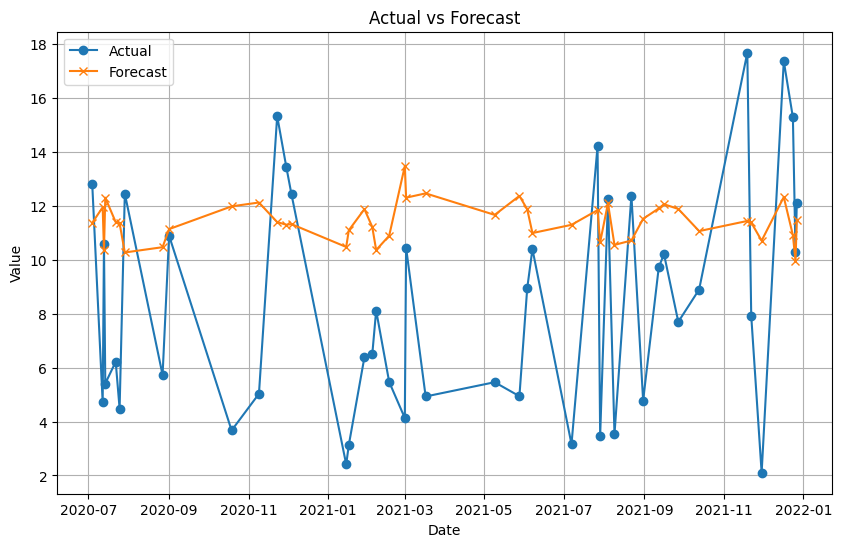

In [191]:
from sklearn.ensemble import RandomForestRegressor

Prophet_Sales=copy.deepcopy(Tryy)
Prophet_Sales.head()

Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)


scaler_PS = StandardScaler()
numm_PS=Prophet_Sales.drop("y",axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
  Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

Prophet_Sales.head()

train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS= Prophet_Sales[:train_size_PS]
test_PS= Prophet_Sales[train_size_PS:]
print("Train size :",len(train_PS),"\nTest size :",len(test_PS))

# Ensure 'ds' is properly transformed
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Train RandomForest with regressor
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']              # Target

X_test = test_PS.drop("y", axis=1)   # Features for testing
y_test = test_PS['y']                # True target values for testing

# Fit the RandomForest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)


# Evaluate performance
RF_mae = mean_absolute_error(y_test, y_pred)
RF_rmse = mean_squared_error(y_test, y_pred, squared=False)
RF_mape = (abs((y_test - y_pred)) /y_test).mean() * 100

print(f"RandomForestt - MAE: {RF_mae}, RMSE: {RF_rmse}, MAPE: {RF_mape}%")

# Predict on training data
y_train_pred = rf.predict(X_train)

# Evaluate performance on training data
train_RF_mae = mean_absolute_error(y_train, y_train_pred)
train_RF_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_RF_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Metrics:")
print(f"RandomForest - Train MAE: {train_RF_mae}, Train RMSE: {train_RF_rmse}, Train MAPE: {train_RF_mape}%")


# Plot
plt.figure(figsize=(10, 6))
plt.plot(Prophet_Sales[train_size_PS:] ['ds'], y_test, label='Actual', marker='o')
plt.plot(Prophet_Sales[train_size_PS:] ['ds'], y_pred, label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()



Train size : 102 
Test size : 45
RandomForestt - MAE: 4.405460000000002, RMSE: 5.2097683305924924, MAPE: 92.57380691754258%
Training Metrics:
RandomForest - Train MAE: 1.3066549019607836, Train RMSE: 1.7768603514152048, Train MAPE: 19.714812534922164%


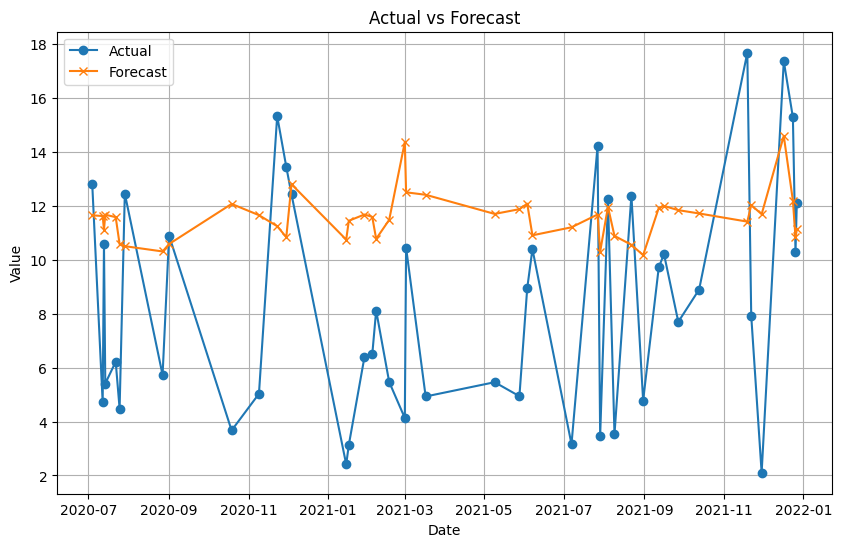

In [192]:

Prophet_Sales=copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.head()

Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins",axis=1,inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins",axis=1,inplace=True)

scaler_PS = StandardScaler()
numm_PS=Prophet_Sales.drop("y",axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
  Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])


Prophet_Sales["Year"]=Prophet_Sales.ds.dt.year
Prophet_Sales["Month"]=Prophet_Sales.ds.dt.month


Prophet_Sales.head()



train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS= Prophet_Sales[:train_size_PS]
test_PS= Prophet_Sales[train_size_PS:]
print("Train size :",len(train_PS),"\nTest size :",len(test_PS))

# Ensure 'ds' is properly transformed
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Train RandomForest with regressor
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']              # Target

X_test = test_PS.drop("y", axis=1)   # Features for testing
y_test = test_PS['y']                # True target values for testing

# Fit the RandomForest model
rf_1 = RandomForestRegressor()
rf_1.fit(X_train, y_train)

# Predict
y_pred = rf_1.predict(X_test)


# Evaluate performance
RF_mae = mean_absolute_error(y_test, y_pred)
RF_rmse = mean_squared_error(y_test, y_pred, squared=False)
RF_mape = (abs((y_test - y_pred)) /y_test).mean() * 100

print(f"RandomForestt - MAE: {RF_mae}, RMSE: {RF_rmse}, MAPE: {RF_mape}%")


# Predict on training data
y_train_pred = rf_1.predict(X_train)

# Evaluate performance on training data
train_RF_mae = mean_absolute_error(y_train, y_train_pred)
train_RF_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_RF_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Metrics:")
print(f"RandomForest - Train MAE: {train_RF_mae}, Train RMSE: {train_RF_rmse}, Train MAPE: {train_RF_mape}%")



# Plot
plt.figure(figsize=(10, 6))
plt.plot(Prophet_Sales[train_size_PS:] ['ds'], y_test, label='Actual', marker='o')
plt.plot(Prophet_Sales[train_size_PS:] ['ds'], y_pred, label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()



In [193]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_1, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score: {cv_scores.mean()}")

R² Score: -0.55
Cross-validation R² scores: [-1.82975336  0.23664162  0.22517467 -0.34714527 -0.51909602]
Mean R² score: -0.4468356704722254


Quantity           -0.111001
Aging               0.009208
y                   1.067378
HV_bins_encoded    -1.430153
MVA_bins_encoded   -1.458095
Year               -0.153647
Month               0.092725
dtype: float64
Quantity           -0.111001
Aging               0.009208
y                  -0.018491
HV_bins_encoded    -1.430153
MVA_bins_encoded   -1.458095
Year               -0.153647
Month               0.092725
dtype: float64
Train size : 102 
Test size : 45
XGBoost - MAE: 3.8866806721157494, RMSE: 4.5264041251885505, MAPE: 76.98907262891463%
Training Performance - MAE: 2.3620177775738282, RMSE: 3.333252292487011, MAPE: 32.257100290735856%
R² Score: -0.17
Cross-validation R² scores: [-0.60594589  0.41339297  0.05896369 -0.41918273 -0.38469253]
Mean R² score: -0.18749289808788402


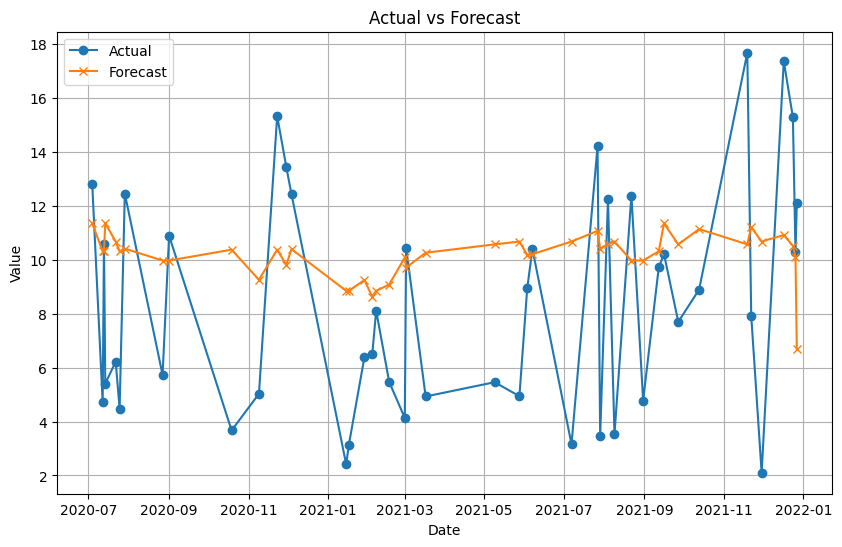

In [194]:
import xgboost as xgb

Prophet_Sales = copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

# Encoding categorical features
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins", axis=1, inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins", axis=1, inplace=True)

# Creating temporal features
Prophet_Sales["Year"] = Prophet_Sales.ds.dt.year
Prophet_Sales["Month"] = Prophet_Sales.ds.dt.month

print(Prophet_Sales.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Prophet_Sales['y'] = np.log1p(Prophet_Sales['y'])

# Check for skewness
print(Prophet_Sales.drop('ds', axis=1).skew())


# Scaling numerical columns
scaler_PS = StandardScaler()
numm_PS = Prophet_Sales.drop("y", axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
    Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

# Split data into train and test sets
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS = Prophet_Sales[:train_size_PS]
test_PS = Prophet_Sales[train_size_PS:]

print("Train size :", len(train_PS), "\nTest size :", len(test_PS))

# Ensure 'ds' is properly transformed to ordinal values
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Features and target
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']               # Target

X_test = test_PS.drop("y", axis=1)    # Features for testing
y_test = test_PS['y']                 # True target values for testing

# XGBoost Model
xg_reg = xgb.XGBRegressor(alpha=0.01, lambda_=1,max_depth=3,learning_rate=0.01,n_estimators=200)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict
y_pred = xg_reg.predict(X_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)


# Evaluate performance
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = mean_squared_error(y_test, y_pred, squared=False)
xgb_mape = (abs((y_test - y_pred)) / y_test).mean() * 100

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, MAPE: {xgb_mape}%")

# Evaluate performance on training data
y_train_pred = xg_reg.predict(X_train)

y_train_pred = np.expm1(y_train_pred)
y_train=np.expm1(y_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score: {cv_scores.mean()}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(Prophet_Sales[train_size_PS:]['ds'], y_test, label='Actual', marker='o')
plt.plot(Prophet_Sales[train_size_PS:]['ds'], y_pred, label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()



In [373]:
""" from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 500],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'alpha':[0.01,0.05] ,
    'lambda_':[1,2]
}
grid_search = GridSearchCV(xg_reg, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_) """


' from sklearn.model_selection import GridSearchCV\nparam_grid = {\n    \'learning_rate\': [0.01, 0.05, 0.1],\n    \'max_depth\': [3, 6, 9],\n    \'n_estimators\': [100, 200, 500],\n    \'subsample\': [0.7, 0.8, 1.0],\n    \'colsample_bytree\': [0.7, 0.8, 1.0],\n    \'alpha\':[0.01,0.05] ,\n    \'lambda_\':[1,2]\n}\ngrid_search = GridSearchCV(xg_reg, param_grid, scoring=\'neg_mean_absolute_error\', cv=5)\ngrid_search.fit(X_train, y_train)\nprint("Best Parameters:", grid_search.best_params_) '

Quantity           -0.111001
Aging               0.009208
y                   1.067378
HV_bins_encoded    -1.430153
MVA_bins_encoded   -1.458095
Year               -0.153647
Month               0.092725
dtype: float64
Quantity           -0.111001
Aging               0.009208
y                  -0.018491
HV_bins_encoded    -1.430153
MVA_bins_encoded   -1.458095
Year               -0.153647
Month               0.092725
dtype: float64
Train size : 102 
Test size : 45
XGBoost - MAE: 3.739031723022461, RMSE: 4.365805001512087, MAPE: 74.02902171346243%
R² Score: -0.09
Cross-validation R² scores: [-0.55036899  0.22692222  0.02553693 -0.0969484  -0.20991063]
Mean R² score: -0.12095377277184369
Training Performance - MAE: 2.3913927947773654, RMSE: 3.341529441798208, MAPE: 32.55616884491496%


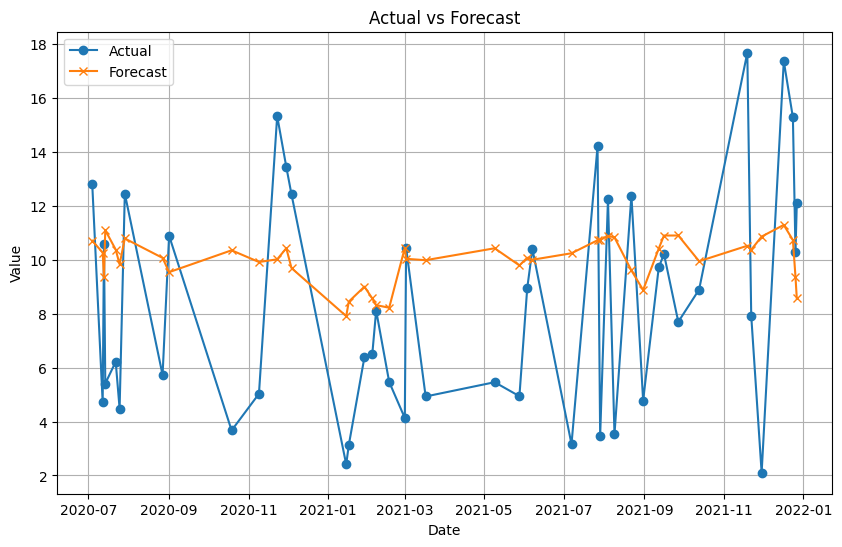

In [197]:
import xgboost as xgb

Prophet_Sales = copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

# Encoding categorical features
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins", axis=1, inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins", axis=1, inplace=True)


# Creating temporal features
Prophet_Sales["Year"] = Prophet_Sales.ds.dt.year
Prophet_Sales["Month"] = Prophet_Sales.ds.dt.month

print(Prophet_Sales.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Prophet_Sales['y'] = np.log1p(Prophet_Sales['y'])
# Check for skewness
print(Prophet_Sales.drop('ds', axis=1).skew())


# Scaling numerical columns
scaler_PS = StandardScaler()
numm_PS = Prophet_Sales.drop("y", axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
    Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

# Split data into train and test sets
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS = Prophet_Sales[:train_size_PS]
test_PS = Prophet_Sales[train_size_PS:]

print("Train size :", len(train_PS), "\nTest size :", len(test_PS))

# Ensure 'ds' is properly transformed to ordinal values
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Features and target
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']               # Target

X_test = test_PS.drop("y", axis=1)    # Features for testing
y_test = test_PS['y']                 # True target values for testing

# XGBoost Model
xg_reg = xgb.XGBRegressor(colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7,alpha=0.01,lambda_=1)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict
y_pred = xg_reg.predict(X_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)


# Evaluate performance
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = mean_squared_error(y_test, y_pred, squared=False)
xgb_mape = (abs((y_test - y_pred)) / y_test).mean() * 100

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, MAPE: {xgb_mape}%")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score: {cv_scores.mean()}")


# Evaluate performance on training data
y_train_pred = xg_reg.predict(X_train)

y_train_pred = np.expm1(y_train_pred)
y_train=np.expm1(y_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")


# Plot
plt.figure(figsize=(10, 6))
plt.plot(Prophet_Sales[train_size_PS:]['ds'], y_test, label='Actual', marker='o')
plt.plot(Prophet_Sales[train_size_PS:]['ds'], y_pred, label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()



In [375]:
Transformer_data_sorted_won.head()

,Quantity,Aging,Total Sales,Award Date,HV_bins,MVA_bins
0,13,44,6.59,2016-01-01,HV-9,MVA-7
1,18,-21,7.78,2016-01-10,HV-9,MVA-8
2,7,8,10.28,2016-01-23,HV-9,MVA-1
3,18,-15,4.97,2016-02-23,HV-6,MVA-7
4,15,-73,2.24,2016-03-30,HV-9,MVA-7


Quantity   -0.111001
Aging       0.009208
y           1.942496
Year        0.036585
Month      -0.137615
dtype: float64
Quantity   -0.111001
Aging       0.009208
y           0.462466
Year        0.036585
Month      -0.137615
dtype: float64
Train size : 102 
Test size : 45
XGBoost - MAE: 2.5598262341817217, RMSE: 3.3417184441282632, MAPE: 43.12783772419868%
Cross-validation R² scores: [ 0.00505302  0.03486915  0.21207445 -0.08532296 -0.13267066]
Training Performance - MAE: 2.4628687542560055, RMSE: 3.8684248965780994, MAPE: 33.005718867034155%


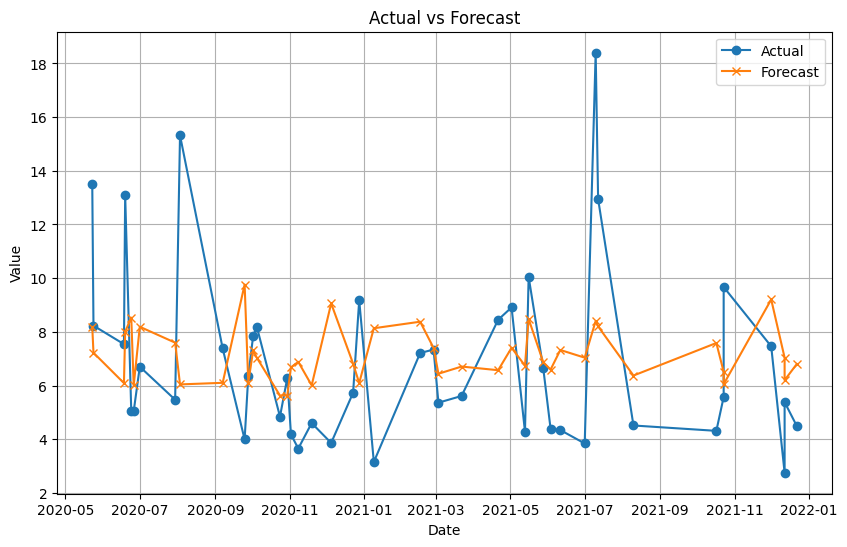

In [ ]:
from sklearn.preprocessing import RobustScaler

Prophet_Sales = copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

# Drop unnecessary columns
Prophet_Sales.drop(['HV_bins', "MVA_bins"], axis=1, inplace=True)

# Creating temporal features
Prophet_Sales["Year"] = Prophet_Sales.ds.dt.year
Prophet_Sales["Month"] = Prophet_Sales.ds.dt.month

print(Prophet_Sales.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Prophet_Sales['y'] = np.log1p(Prophet_Sales['y'])

# Check for skewness
print(Prophet_Sales.drop('ds', axis=1).skew())




# Scaling numerical columns
scaler_PS = RobustScaler()
numm_PS = Prophet_Sales.drop("y", axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
    Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

# Split data into train and test sets
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS = Prophet_Sales[:train_size_PS]
test_PS = Prophet_Sales[train_size_PS:]

print("Train size :", len(train_PS), "\nTest size :", len(test_PS))

# Ensure 'ds' is properly transformed to ordinal values
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Features and target
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']               # Target

X_test = test_PS.drop("y", axis=1)    # Features for testing
y_test = test_PS['y']                 # True target values for testing

# XGBoost Model
xg_reg = xgb.XGBRegressor(colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7,alpha=0.01,lambda_=1)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict
y_pred = xg_reg.predict(X_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)


# Evaluate performance
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = mean_squared_error(y_test, y_pred, squared=False)
xgb_mape = (abs((y_test - y_pred)) / y_test).mean() * 100

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, MAPE: {xgb_mape}%")


from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")


# Evaluate performance on training data
y_train_pred = xg_reg.predict(X_train)

y_train_pred = np.expm1(y_train_pred)
y_train=np.expm1(y_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")


# Plot
plt.figure(figsize=(10, 6))
plt.plot(Prophet_Sales[train_size_PS:]['ds'], y_test, label='Actual', marker='o')
plt.plot(Prophet_Sales[train_size_PS:]['ds'], y_pred, label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()


#Better    train 33.00 test 43.12

In [198]:

Prophet_Sales = copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

# Encoding categorical features
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins", axis=1, inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins", axis=1, inplace=True)


# Creating temporal features
Prophet_Sales["Year"] = Prophet_Sales.ds.dt.year
Prophet_Sales["Month"] = Prophet_Sales.ds.dt.month

#print(Prophet_Sales.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Prophet_Sales['y'] = np.log1p(Prophet_Sales['y'])

# Check for skewness
#print(Prophet_Sales.drop('ds', axis=1).skew())


# Scaling numerical columns
scaler_PS = StandardScaler()
numm_PS = Prophet_Sales.drop("y", axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
    Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

# Split data into train and test sets
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS = Prophet_Sales[:train_size_PS]
test_PS = Prophet_Sales[train_size_PS:]

print("Train size :", len(train_PS), "\nTest size :", len(test_PS))

# Ensure 'ds' is properly transformed to ordinal values
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Features and target
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']               # Target

X_test = test_PS.drop("y", axis=1)    # Features for testing
y_test = test_PS['y']                 # True target values for testing


# ----------------------------- PCA ------------------------------------------------------------------


from sklearn.decomposition import PCA
import xgboost as xgb



# Apply PCA to reduce dimensions
pca = PCA(n_components=0.5)  # Retain 50% of the explained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")

# XGBoost Model after PCA
xg_reg_pca = xgb.XGBRegressor(
    colsample_bytree=1.0, learning_rate=0.01, max_depth=3,
    n_estimators=200, subsample=0.7, alpha=0.01, lambda_=1
)

# Fit the model
xg_reg_pca.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_pca = xg_reg_pca.predict(X_test_pca)

# Reverse log transformation
y_pred_pca = np.expm1(y_pred_pca)
y_test_pca = np.expm1(y_test)

# Evaluate performance
xgb_pca_mae = mean_absolute_error(y_test_pca, y_pred_pca)
xgb_pca_rmse = mean_squared_error(y_test_pca, y_pred_pca, squared=False)
xgb_pca_mape = (abs((y_test_pca - y_pred_pca)) / y_test_pca).mean() * 100

print(f"XGBoost after PCA - MAE: {xgb_pca_mae}, RMSE: {xgb_pca_rmse}, MAPE: {xgb_pca_mape}%")

# R² Score
r2_pca = r2_score(y_test_pca, y_pred_pca)
print(f"R² Score after PCA: {r2_pca:.2f}")


# Predict on the training set
y_train_pred_pca = xg_reg_pca.predict(X_train_pca)

# Reverse log transformation for training predictions
y_train_pred_pca = np.expm1(y_train_pred_pca)
y_train_pca = np.expm1(y_train)

# Evaluate performance on the training data
xgb_train_mae = mean_absolute_error(y_train_pca, y_train_pred_pca)
xgb_train_rmse = mean_squared_error(y_train_pca, y_train_pred_pca, squared=False)
xgb_train_mape = (abs((y_train_pca - y_train_pred_pca)) / y_train_pca).mean() * 100

print(f"Training Performance - MAE: {xgb_train_mae}, RMSE: {xgb_train_rmse}, MAPE: {xgb_train_mape}%")

# R² Score on the training set
r2_train_pca = r2_score(y_train_pca, y_train_pred_pca)
print(f"R² Score on Training Data after PCA: {r2_train_pca:.2f}")





Train size : 102 
Test size : 45
[0.99997343]
Original number of features: 7
Reduced number of features: 1
XGBoost after PCA - MAE: 3.876106605529785, RMSE: 4.518411253888208, MAPE: 76.74241381432775%
R² Score after PCA: -0.16
Training Performance - MAE: 2.8761976477679085, RMSE: 4.1233657690613, MAPE: 39.32433717797142%
R² Score on Training Data after PCA: 0.23


In [ ]:

Prophet_Sales = copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

# Encoding categorical features
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins", axis=1, inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins", axis=1, inplace=True)


# Creating temporal features
Prophet_Sales["Year"] = Prophet_Sales.ds.dt.year
Prophet_Sales["Month"] = Prophet_Sales.ds.dt.month

#print(Prophet_Sales.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Prophet_Sales['y'] = np.log1p(Prophet_Sales['y'])

# Check for skewness
#print(Prophet_Sales.drop('ds', axis=1).skew())


# Scaling numerical columns
scaler_PS = StandardScaler()
numm_PS = Prophet_Sales.drop("y", axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
    Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

# Split data into train and test sets
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS = Prophet_Sales[:train_size_PS]
test_PS = Prophet_Sales[train_size_PS:]

print("Train size :", len(train_PS), "\nTest size :", len(test_PS))

# Ensure 'ds' is properly transformed to ordinal values
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Features and target
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']               # Target

X_test = test_PS.drop("y", axis=1)    # Features for testing
y_test = test_PS['y']                 # True target values for testing


# ----------------------------- PCA ------------------------------------------------------------------


from sklearn.decomposition import PCA
import xgboost as xgb



# Apply PCA to reduce dimensions
pca = PCA(n_components=4)  # Retain 95% of the explained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")

# XGBoost Model after PCA
xg_reg_pca = xgb.XGBRegressor(
    colsample_bytree=1.0, learning_rate=0.01, max_depth=3,
    n_estimators=200, subsample=0.7, alpha=0.01, lambda_=1
)

# Fit the model
xg_reg_pca.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_pca = xg_reg_pca.predict(X_test_pca)

# Reverse log transformation
y_pred_pca = np.expm1(y_pred_pca)
y_test_pca = np.expm1(y_test)

# Evaluate performance
xgb_pca_mae = mean_absolute_error(y_test_pca, y_pred_pca)
xgb_pca_rmse = mean_squared_error(y_test_pca, y_pred_pca, squared=False)
xgb_pca_mape = (abs((y_test_pca - y_pred_pca)) / y_test_pca).mean() * 100

print(f"XGBoost after PCA - MAE: {xgb_pca_mae}, RMSE: {xgb_pca_rmse}, MAPE: {xgb_pca_mape}%")

# R² Score
r2_pca = r2_score(y_test_pca, y_pred_pca)
print(f"R² Score after PCA: {r2_pca:.2f}")

# Predict on the training set
y_train_pred_pca = xg_reg_pca.predict(X_train_pca)

# Reverse log transformation for training predictions
y_train_pred_pca = np.expm1(y_train_pred_pca)
y_train_pca = np.expm1(y_train)

# Evaluate performance on the training data
xgb_train_mae = mean_absolute_error(y_train_pca, y_train_pred_pca)
xgb_train_rmse = mean_squared_error(y_train_pca, y_train_pred_pca, squared=False)
xgb_train_mape = (abs((y_train_pca - y_train_pred_pca)) / y_train_pca).mean() * 100

print(f"Training Performance - MAE: {xgb_train_mae}, RMSE: {xgb_train_rmse}, MAPE: {xgb_train_mape}%")

# R² Score on the training set
r2_train_pca = r2_score(y_train_pca, y_train_pred_pca)
print(f"R² Score on Training Data after PCA: {r2_train_pca:.2f}")

# Best  train 30.9 test 34.84

Train size : 102 
Test size : 45
[9.99969435e-01 8.38026579e-06 7.33443621e-06 5.44611905e-06]
Original number of features: 7
Reduced number of features: 4
XGBoost after PCA - MAE: 2.1339027506510417, RMSE: 2.969805054124046, MAPE: 34.84305154819036%
R² Score after PCA: 0.21
Training Performance - MAE: 2.3711639011607453, RMSE: 3.876236089851393, MAPE: 30.958100632511943%
R² Score on Training Data after PCA: 0.37


In [379]:
""" Prophet_Sales['y_lag_1'] = Prophet_Sales['y'].shift(1)  # 1-day lag
Prophet_Sales['y_lag_2'] = Prophet_Sales['y'].shift(2)  # 2-day lag
Prophet_Sales['y_lag_7'] = Prophet_Sales['y'].shift(7)  # 1-week lag
Prophet_Sales['y_lag_30'] = Prophet_Sales['y'].shift(30)  # 1-month lag
 """

" Prophet_Sales['y_lag_1'] = Prophet_Sales['y'].shift(1)  # 1-day lag\nProphet_Sales['y_lag_2'] = Prophet_Sales['y'].shift(2)  # 2-day lag\nProphet_Sales['y_lag_7'] = Prophet_Sales['y'].shift(7)  # 1-week lag\nProphet_Sales['y_lag_30'] = Prophet_Sales['y'].shift(30)  # 1-month lag\n "

Quantity   -0.111001
Aging       0.009208
y           1.942496
Year        0.036585
Month      -0.137615
y_lag_1     1.934193
y_lag_2     1.923326
y_lag_7     1.905798
y_lag_30    1.862070
dtype: float64
Quantity   -0.111001
Aging       0.009208
y           0.462466
Year        0.036585
Month      -0.137615
y_lag_1     1.934193
y_lag_2     1.923326
y_lag_7     1.905798
y_lag_30    1.862070
dtype: float64
Train size : 102 
Test size : 45
XGBoost - MAE: 2.5839651764763727, RMSE: 3.3537137569408046, MAPE: 47.13938267586249%
R² Score: -0.01
Cross-validation R² scores: [-0.02013334  0.05535105  0.20297311 -0.01566518  0.15429425]
Mean R² score: 0.07536397869345231
Training Performance - MAE: 2.147641535927267, RMSE: 3.434151498639565, MAPE: 28.577212866968548%


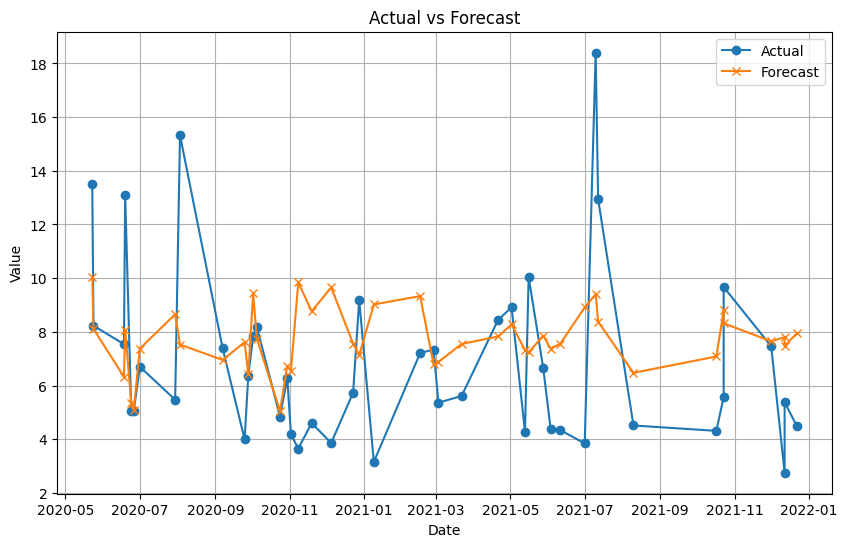

In [ ]:
from sklearn.preprocessing import RobustScaler

Prophet_Sales = copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

# Drop unnecessary columns
Prophet_Sales.drop(['HV_bins', "MVA_bins"], axis=1, inplace=True)

# Creating temporal features
Prophet_Sales["Year"] = Prophet_Sales.ds.dt.year
Prophet_Sales["Month"] = Prophet_Sales.ds.dt.month


Prophet_Sales['y_lag_1'] = Prophet_Sales['y'].shift(1)  # 1-day lag
Prophet_Sales['y_lag_2'] = Prophet_Sales['y'].shift(2)  # 2-day lag
Prophet_Sales['y_lag_7'] = Prophet_Sales['y'].shift(7)  # 1-week lag
Prophet_Sales['y_lag_30'] = Prophet_Sales['y'].shift(30)  # 1-month lag


print(Prophet_Sales.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Prophet_Sales['y'] = np.log1p(Prophet_Sales['y'])

# Check for skewness
print(Prophet_Sales.drop('ds', axis=1).skew())




# Scaling numerical columns
scaler_PS = RobustScaler()
numm_PS = Prophet_Sales.drop("y", axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
    Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

# Split data into train and test sets
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS = Prophet_Sales[:train_size_PS]
test_PS = Prophet_Sales[train_size_PS:]

print("Train size :", len(train_PS), "\nTest size :", len(test_PS))

# Ensure 'ds' is properly transformed to ordinal values
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Features and target
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']               # Target

X_test = test_PS.drop("y", axis=1)    # Features for testing
y_test = test_PS['y']                 # True target values for testing

# XGBoost Model
xg_reg = xgb.XGBRegressor(colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7,alpha=0.01,lambda_=1)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict
y_pred = xg_reg.predict(X_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)


# Evaluate performance
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = mean_squared_error(y_test, y_pred, squared=False)
xgb_mape = (abs((y_test - y_pred)) / y_test).mean() * 100

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, MAPE: {xgb_mape}%")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score: {cv_scores.mean()}")


# Evaluate performance on training data
y_train_pred = xg_reg.predict(X_train)

y_train_pred = np.expm1(y_train_pred)
y_train=np.expm1(y_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")


# Plot
plt.figure(figsize=(10, 6))
plt.plot(Prophet_Sales[train_size_PS:]['ds'], y_test, label='Actual', marker='o')
plt.plot(Prophet_Sales[train_size_PS:]['ds'], y_pred, label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()




Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 1861724800.0000
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 458532448.0000
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 346505952.0000
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 91288896.0000
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 37323760.0000
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 36407480.0000
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 17824106.0000
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 5688728.5000
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 2313004.7500
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 1480054.7500
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - loss: 927858.6875
Epoch 12/100
7/7 [==============================] - 0s 4ms/step 

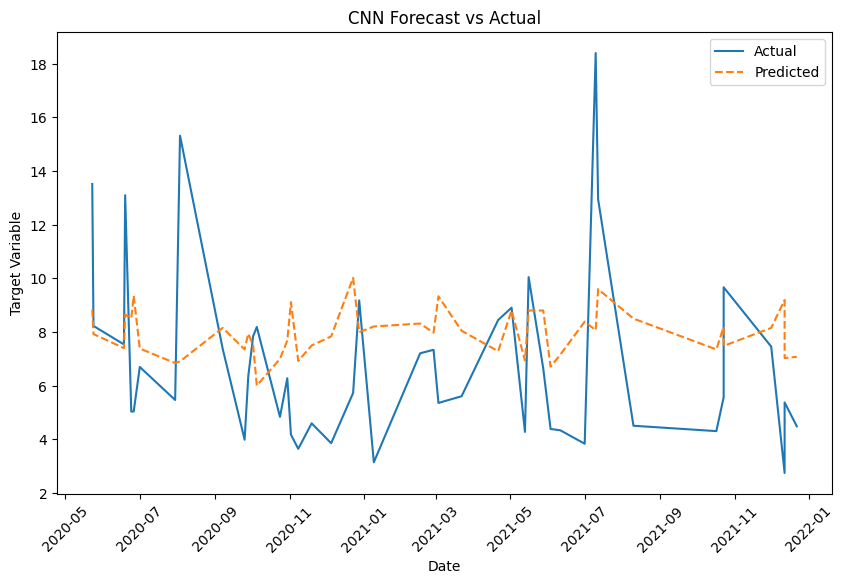

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Dropout
from keras.callbacks import EarlyStopping


import xgboost as xgb

Prophet_Sales = copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

# Encoding categorical features
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins", axis=1, inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins", axis=1, inplace=True)

# Creating temporal features
Prophet_Sales["Year"] = Prophet_Sales.ds.dt.year
Prophet_Sales["Month"] = Prophet_Sales.ds.dt.month

#print(Prophet_Sales.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Prophet_Sales['y'] = np.log1p(Prophet_Sales['y'])

# Check for skewness
print(Prophet_Sales.drop('ds', axis=1).skew())


# Scaling numerical columns
scaler_PS = StandardScaler()
numm_PS = Prophet_Sales.drop("y", axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
    Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

# Split data into train and test sets
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS = Prophet_Sales[:train_size_PS]
test_PS = Prophet_Sales[train_size_PS:]

print("Train size :", len(train_PS), "\nTest size :", len(test_PS))

# Ensure 'ds' is properly transformed to ordinal values
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Features and target
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']               # Target

X_test = test_PS.drop("y", axis=1)    # Features for testing
y_test = test_PS['y']                 # True target values for testing

X_train.head()


#=============================================================================================================================  



# Prepare the data for CNN (reshape to 3D: [samples, time steps, features])
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshaping to 3D (samples, features, 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshaping to 3D (samples, features, 1)

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))  # 1D Conv layer
#cnn_model.add(Dropout(0.2))
cnn_model.add(MaxPooling1D(pool_size=2))  # MaxPooling layer
#cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu')) 
#cnn_model.add(MaxPooling1D(pool_size=2))  # MaxPooling layer
cnn_model.add(Flatten())  # Flatten the output
cnn_model.add(Dense(50, activation='relu'))  # Fully connected layer
cnn_model.add(Dense(1))  # Output layer for regression

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')


#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#cnn_model.fit(X_train_cnn, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stopping])


# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=16, verbose=1)

# Predict
cnn_forecast = cnn_model.predict(X_test_cnn).flatten()

y_test_original = np.expm1(y_test)
cnn_forecast_original = np.expm1(cnn_forecast)

# Evaluate performance
cnn_mae = mean_absolute_error(y_test, cnn_forecast)
cnn_rmse = mean_squared_error(y_test, cnn_forecast, squared=False)
cnn_mape = (abs(y_test - cnn_forecast) / y_test).mean() * 100

print(f"CNN - MAE: {cnn_mae}, RMSE: {cnn_rmse}, MAPE: {cnn_mape}%")

# Evaluate performance on training data
y_train_pred = cnn_model.predict(X_train).flatten()

y_train_pred = np.expm1(y_train_pred)
y_train=np.expm1(y_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(Prophet_Sales[train_size_PS:]['ds'], y_test_original, label='Actual')
plt.plot(Prophet_Sales[train_size_PS:]['ds'], cnn_forecast_original, label='Predicted', linestyle='--')
plt.legend()
plt.title("CNN Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()


In [384]:
print("y_test values:\n", y_test_original.head())
print("cnn_forecast values:\n", cnn_forecast_original[:5])



y_test values:
 102    13.52
103     8.23
104     7.54
105    13.10
106     5.04
Name: y, dtype: float64
cnn_forecast values:
 [8.842303  7.9265814 7.4021416 8.651936  8.520874 ]


In [385]:
print("y_test values:\n", y_train.head())
print("cnn_forecast values:\n", y_train_pred[:5])


y_test values:
 0     6.59
1     7.78
2    10.28
3     4.97
4     2.24
Name: y, dtype: float64
cnn_forecast values:
 [7.822583 8.191971 9.016842 8.958322 7.979039]


In [386]:
print(X_train_cnn.shape)

(102, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping



Prophet_Sales = copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

# Encoding categorical features
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins", axis=1, inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins", axis=1, inplace=True)

# Creating temporal features
Prophet_Sales["Year"] = Prophet_Sales.ds.dt.year
Prophet_Sales["Month"] = Prophet_Sales.ds.dt.month

#print(Prophet_Sales.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Prophet_Sales['y'] = np.log1p(Prophet_Sales['y'])

# Check for skewness
print(Prophet_Sales.drop('ds', axis=1).skew())


# Scaling numerical columns
scaler_PS = StandardScaler()
numm_PS = Prophet_Sales.drop("y", axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
    Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

# Split data into train and test sets
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS = Prophet_Sales[:train_size_PS]
test_PS = Prophet_Sales[train_size_PS:]

print("Train size :", len(train_PS), "\nTest size :", len(test_PS))

# Ensure 'ds' is properly transformed to ordinal values
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Features and target
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']               # Target

X_test = test_PS.drop("y", axis=1)    # Features for testing
y_test = test_PS['y']                 # True target values for testing

X_train.head()


#=============================================================================================================================  


# Ensure input is reshaped properly
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape to 3D
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Debugging check
print("Train CNN shape:", X_train_cnn.shape)  # Must be (samples, time_steps, features)
print("Test CNN shape:", X_test_cnn.shape)

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))  # Output layer

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Set early stopping to monitor validation
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
cnn_model.fit(X_train_cnn, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stopping])

# Predict
cnn_forecast = cnn_model.predict(X_test_cnn).flatten()

# Performance metrics
y_test_original = np.expm1(y_test)
cnn_forecast_original = np.expm1(cnn_forecast)


# Evaluate performance on training data
y_train_pred = cnn_model.predict(X_train).flatten()

y_train_pred = np.expm1(y_train_pred)
y_train=np.expm1(y_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")


cnn_mae = mean_absolute_error(y_test, cnn_forecast)
cnn_rmse = mean_squared_error(y_test, cnn_forecast, squared=False)
cnn_mape = (abs(y_test - cnn_forecast) / y_test).mean() * 100

print(f"CNN - MAE: {cnn_mae}, RMSE: {cnn_rmse}, MAPE: {cnn_mape}%")


Quantity           -0.111001
Aging               0.009208
y                   0.462466
HV_bins_encoded    -1.430153
MVA_bins_encoded   -1.458095
Year                0.036585
Month              -0.137615
dtype: float64
Train size : 102 
Test size : 45
Train CNN shape: (102, 7, 1)
Test CNN shape: (45, 7, 1)
Epoch 1/100
6/6 [==============================] - 1s 46ms/step - loss: 173995888.0000 - val_loss: 3245551.2500
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 55683124.0000 - val_loss: 3177487.0000
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 29730108.0000 - val_loss: 609605.8750
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 15394271.0000 - val_loss: 61180.7266
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 8118266.5000 - val_loss: 34804.7422
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 4436400.0000 - val_loss: 137868.3125
Epoch 7/100
6/6 [=================

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping


import xgboost as xgb

Prophet_Sales = copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

# Encoding categorical features
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins", axis=1, inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins", axis=1, inplace=True)

# Creating temporal features
Prophet_Sales["Year"] = Prophet_Sales.ds.dt.year
Prophet_Sales["Month"] = Prophet_Sales.ds.dt.month

#print(Prophet_Sales.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Prophet_Sales['y'] = np.log1p(Prophet_Sales['y'])

# Check for skewness
print(Prophet_Sales.drop('ds', axis=1).skew())


# Scaling numerical columns
scaler_PS = StandardScaler()
numm_PS = Prophet_Sales.drop("y", axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
    Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

# Split data into train and test sets
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS = Prophet_Sales[:train_size_PS]
test_PS = Prophet_Sales[train_size_PS:]

print("Train size :", len(train_PS), "\nTest size :", len(test_PS))

# Ensure 'ds' is properly transformed to ordinal values
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Features and target
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']               # Target

X_test = test_PS.drop("y", axis=1)    # Features for testing
y_test = test_PS['y']                 # True target values for testing

X_train.head()



#=============================================================================================================================  


# Ensure input is reshaped properly
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape to 3D
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Debugging check
print("Train CNN shape:", X_train_cnn.shape)  # Must be (samples, time_steps, features)
print("Test CNN shape:", X_test_cnn.shape)

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))  # Output layer

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Set early stopping to monitor validation
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
cnn_model.fit(X_train_cnn, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stopping])

# Predict
cnn_forecast = cnn_model.predict(X_test_cnn).flatten()

# Performance metrics
y_test_original = np.expm1(y_test)
cnn_forecast_original = np.expm1(cnn_forecast)


# Evaluate performance on training data
y_train_pred = cnn_model.predict(X_train).flatten()

y_train_pred = np.expm1(y_train_pred)
y_train=np.expm1(y_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")


cnn_mae = mean_absolute_error(y_test, cnn_forecast)
cnn_rmse = mean_squared_error(y_test, cnn_forecast, squared=False)
cnn_mape = (abs(y_test - cnn_forecast) / y_test).mean() * 100

print(f"CNN - MAE: {cnn_mae}, RMSE: {cnn_rmse}, MAPE: {cnn_mape}%")


Quantity           -0.111001
Aging               0.009208
y                   0.462466
HV_bins_encoded    -1.430153
MVA_bins_encoded   -1.458095
Year                0.036585
Month              -0.137615
dtype: float64
Train size : 102 
Test size : 45
Train CNN shape: (102, 7, 1)
Test CNN shape: (45, 7, 1)
Epoch 1/100
6/6 [==============================] - 1s 51ms/step - loss: 14238767104.0000 - val_loss: 1566183424.0000
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 511715360.0000 - val_loss: 1348134400.0000
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 1956217088.0000 - val_loss: 1893916288.0000
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 1200145152.0000 - val_loss: 103517048.0000
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 62080000.0000 - val_loss: 309453120.0000
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 368071968.0000 - val_loss: 241222384.0000
Epo

Quantity           -0.111001
Aging               0.009208
y                  -0.018491
HV_bins_encoded    -1.430153
MVA_bins_encoded   -1.458095
Year               -0.153647
Month               0.092725
dtype: float64
Train size : 102 
Test size : 45
Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 177867600.0000
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 36356940.0000
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 24771378.0000
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 7130283.5000
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 4307620.0000
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 2242094.0000
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 795780.0625
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 513858.1562
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 2942

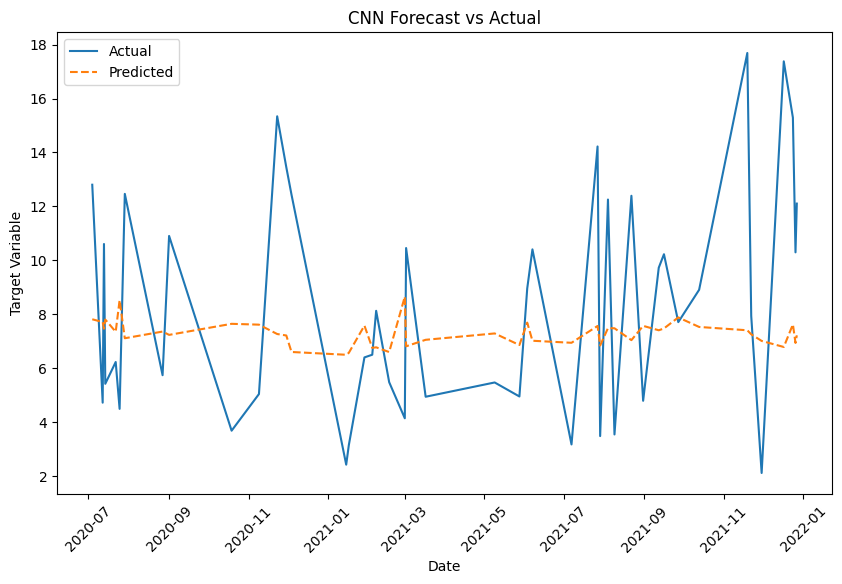

In [104]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping


import xgboost as xgb

Prophet_Sales = copy.deepcopy(Transformer_data_sorted_won)
Prophet_Sales.rename(columns={'Award Date': 'ds', 'Total Sales': 'y'}, inplace=True)

# Encoding categorical features
Prophet_Sales['HV_bins_encoded'] = Prophet_Sales['HV_bins'].astype('category').cat.codes
Prophet_Sales.drop("HV_bins", axis=1, inplace=True)

Prophet_Sales['MVA_bins_encoded'] = Prophet_Sales['MVA_bins'].astype('category').cat.codes
Prophet_Sales.drop("MVA_bins", axis=1, inplace=True)

# Creating temporal features
Prophet_Sales["Year"] = Prophet_Sales.ds.dt.year
Prophet_Sales["Month"] = Prophet_Sales.ds.dt.month

#print(Prophet_Sales.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Prophet_Sales['y'] = np.log1p(Prophet_Sales['y'])

# Check for skewness
print(Prophet_Sales.drop('ds', axis=1).skew())


# Scaling numerical columns
scaler_PS = StandardScaler()
numm_PS = Prophet_Sales.drop("y", axis=1).select_dtypes(include=np.number).columns

for i in numm_PS:
    Prophet_Sales[i] = scaler_PS.fit_transform(Prophet_Sales[[i]])

# Split data into train and test sets
train_size_PS = int(len(Prophet_Sales) * 0.7)
train_PS = Prophet_Sales[:train_size_PS]
test_PS = Prophet_Sales[train_size_PS:]

print("Train size :", len(train_PS), "\nTest size :", len(test_PS))

# Ensure 'ds' is properly transformed to ordinal values
train_PS['ds'] = train_PS['ds'].map(pd.Timestamp.toordinal)
test_PS['ds'] = test_PS['ds'].map(pd.Timestamp.toordinal)

# Features and target
X_train = train_PS.drop("y", axis=1)  # Features
y_train = train_PS['y']               # Target

X_test = test_PS.drop("y", axis=1)    # Features for testing
y_test = test_PS['y']                 # True target values for testing

X_train.head()



#=============================================================================================================================  

# Prepare the data for CNN (reshape to 3D: [samples, time steps, features])
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshaping to 3D (samples, features, 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshaping to 3D (samples, features, 1)

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))  # 1D Conv layer
#cnn_model.add(Dropout(0.2))
cnn_model.add(MaxPooling1D(pool_size=2))  # MaxPooling layer
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu')) 
cnn_model.add(MaxPooling1D(pool_size=2))  # MaxPooling layer
cnn_model.add(Flatten())  # Flatten the output
cnn_model.add(Dense(50, activation='relu'))  # Fully connected layer
cnn_model.add(Dense(1))  # Output layer for regression

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')


#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#cnn_model.fit(X_train_cnn, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stopping])


#Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=16, verbose=1)

# Predict
cnn_forecast = cnn_model.predict(X_test_cnn).flatten()

y_test_original = np.expm1(y_test)
cnn_forecast_original = np.expm1(cnn_forecast)

# Evaluate performance
cnn_mae = mean_absolute_error(y_test_original, cnn_forecast_original)
cnn_rmse = mean_squared_error(y_test_original, cnn_forecast_original, squared=False)
cnn_mape = (abs(y_test_original - cnn_forecast_original) / y_test_original).mean() * 100

print(f"CNN - MAE: {cnn_mae}, RMSE: {cnn_rmse}, MAPE: {cnn_mape}%")

# Evaluate performance on training data
y_train_pred = cnn_model.predict(X_train).flatten()

y_train_pred_original= np.expm1(y_train_pred)
y_train_original=np.expm1(y_train)

train_mae = mean_absolute_error(y_train_original, y_train_pred_original)
train_rmse = mean_squared_error(y_train_original, y_train_pred_original, squared=False)
train_mape = (abs((y_train_original - y_train_pred_original)) / y_train_original).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(Prophet_Sales[train_size_PS:]['ds'], y_test_original, label='Actual')
plt.plot(Prophet_Sales[train_size_PS:]['ds'], cnn_forecast_original, label='Predicted', linestyle='--')
plt.legend()
plt.title("CNN Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()


In [ ]:

# Best  train 30.9 test 34.84